In [1]:
import pandas as pd

In [2]:
total_balance_path=r'merged_final_balance_nadil_tft.xlsx'
total_balance=pd.read_excel(total_balance_path)
total_balance.head()

,Date,Balance
0,2022-11-06,9424.64
1,2022-11-07,9424.64
2,2022-11-08,9424.64
3,2022-11-09,9424.64
4,2022-11-10,9424.64


In [3]:
total_expense_path=r'expense_daily_total_nadil_tft.xlsx'
total_expense=pd.read_excel(total_expense_path)
total_expense.head()

,Date,Payments
0,2022-11-06,9060.0
1,2022-11-07,0.0
2,2022-11-08,0.0
3,2022-11-09,0.0
4,2022-11-10,0.0


In [4]:
merged_balance_expense = pd.merge(total_expense, total_balance, on='Date', how='left')
merged_balance_expense.head()

,Date,Payments,Balance
0,2022-11-06,9060.0,9424.64
1,2022-11-07,0.0,9424.64
2,2022-11-08,0.0,9424.64
3,2022-11-09,0.0,9424.64
4,2022-11-10,0.0,9424.64


In [5]:
print(len(merged_balance_expense))

788


In [6]:
merged_balance_expense['total_expense_of_day']=merged_balance_expense['Payments']
merged_balance_expense=merged_balance_expense.drop(columns=['Payments'])
merged_balance_expense.head()

,Date,Balance,total_expense_of_day
0,2022-11-06,9424.64,9060.0
1,2022-11-07,9424.64,0.0
2,2022-11-08,9424.64,0.0
3,2022-11-09,9424.64,0.0
4,2022-11-10,9424.64,0.0


In [7]:
merged_balance_expense['total_balance_of_day']=merged_balance_expense['Balance']
merged_balance_expense=merged_balance_expense.drop(columns=['Balance'])
merged_balance_expense.head()

,Date,total_expense_of_day,total_balance_of_day
0,2022-11-06,9060.0,9424.64
1,2022-11-07,0.0,9424.64
2,2022-11-08,0.0,9424.64
3,2022-11-09,0.0,9424.64
4,2022-11-10,0.0,9424.64


In [8]:
expense_data_set_path=r'no_test_nadil_tft.xlsx'
expense_data_set=pd.read_excel(expense_data_set_path)
expense_data_set=expense_data_set.drop(columns=['Cluster'])
expense_data_set.head()

,Date,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions
0,2022-11-06,0.0,Uncategorized,9424.64,-0.781831,0.62349,-0.5,0.866025,2145.357143,-2145.357143,0,19.0,685.833333,0.0,0,0.0,0.0,19.0
1,2022-11-06,6030.0,NADIL OTHBNK T,12454.64,-0.781831,0.62349,-0.5,0.866025,5859.090909,170.909091,1,12.0,4670.000000,0.0,1,6030.0,0.0,12.0
2,2022-11-06,3030.0,OTHBNK T,9424.64,-0.781831,0.62349,-0.5,0.866025,3780.000000,-750.000000,1,103.0,4030.000000,0.0,1,3030.0,0.0,103.0
3,2022-11-06,0.0,RIBRMB SECH IBMB CHARGE,9424.64,-0.781831,0.62349,-0.5,0.866025,40.000000,-40.000000,0,54.0,40.000000,0.0,0,0.0,0.0,135.0
4,2022-11-06,0.0,CSH WDR,9424.64,-0.781831,0.62349,-0.5,0.866025,7735.000000,-7735.000000,0,1.0,11408.333333,0.0,0,0.0,0.0,1.0


In [9]:
merged_balance_expense['total_balance_of_day'] = merged_balance_expense['total_balance_of_day'].astype(str).str.replace(r'[^\d.-]', '', regex=True)
merged_balance_expense['total_balance_of_day'] = pd.to_numeric(merged_balance_expense['total_balance_of_day'], errors='coerce')
non_numeric_values = merged_balance_expense['total_balance_of_day'][merged_balance_expense['total_balance_of_day'].apply(lambda x: not isinstance(x, (int, float)))]
print(non_numeric_values)

Series([], Name: total_balance_of_day, dtype: float64)


In [10]:
merged_balance_expense['total_expense_of_day'] = merged_balance_expense['total_expense_of_day'].astype(str).str.replace(r'[^\d.-]', '', regex=True)
merged_balance_expense['total_expense_of_day'] = pd.to_numeric(merged_balance_expense['total_expense_of_day'], errors='coerce')
non_numeric_values = merged_balance_expense['total_expense_of_day'][merged_balance_expense['total_expense_of_day'].apply(lambda x: not isinstance(x, (int, float)))]
print(non_numeric_values)

Series([], Name: total_expense_of_day, dtype: float64)


In [11]:
expense_data_set = pd.merge(expense_data_set, merged_balance_expense, on='Date', how='left')
expense_data_set.head()

,Date,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions,total_expense_of_day,total_balance_of_day
0,2022-11-06,0.0,Uncategorized,9424.64,-0.781831,0.62349,-0.5,0.866025,2145.357143,-2145.357143,0,19.0,685.833333,0.0,0,0.0,0.0,19.0,9060.0,9424.64
1,2022-11-06,6030.0,NADIL OTHBNK T,12454.64,-0.781831,0.62349,-0.5,0.866025,5859.090909,170.909091,1,12.0,4670.000000,0.0,1,6030.0,0.0,12.0,9060.0,9424.64
2,2022-11-06,3030.0,OTHBNK T,9424.64,-0.781831,0.62349,-0.5,0.866025,3780.000000,-750.000000,1,103.0,4030.000000,0.0,1,3030.0,0.0,103.0,9060.0,9424.64
3,2022-11-06,0.0,RIBRMB SECH IBMB CHARGE,9424.64,-0.781831,0.62349,-0.5,0.866025,40.000000,-40.000000,0,54.0,40.000000,0.0,0,0.0,0.0,135.0,9060.0,9424.64
4,2022-11-06,0.0,CSH WDR,9424.64,-0.781831,0.62349,-0.5,0.866025,7735.000000,-7735.000000,0,1.0,11408.333333,0.0,0,0.0,0.0,1.0,9060.0,9424.64


In [12]:
test_expense_data_set_path=r'test_nadil_tft.xlsx'
test_expense_data_set=pd.read_excel(test_expense_data_set_path)
test_expense_data_set=test_expense_data_set.drop(columns=['Cluster'])
test_expense_data_set.head()

,Date,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions
0,2025-01-02,0.0,Uncategorized,1008.22,0.433884,-0.900969,0.5,0.866025,2145.357143,-2145.357143,0,139,3986.666667,0,6,0.0,0.0,19.0
1,2025-01-02,0.0,NADIL OTHBNK T,1008.22,0.433884,-0.900969,0.5,0.866025,5859.090909,-5859.090909,0,606,7880.000000,0,11,0.0,0.0,12.0
2,2025-01-02,0.0,OTHBNK T,1008.22,0.433884,-0.900969,0.5,0.866025,3780.000000,-3780.000000,0,680,4030.000000,0,4,0.0,0.0,103.0
3,2025-01-02,0.0,RIBRMB SECH IBMB CHARGE,1008.22,0.433884,-0.900969,0.5,0.866025,40.000000,-40.000000,0,5,40.000000,2,23,40.0,40.0,135.0
4,2025-01-02,0.0,CSH WDR,1008.22,0.433884,-0.900969,0.5,0.866025,7735.000000,-7735.000000,0,674,7891.666667,0,5,0.0,0.0,1.0


In [33]:
%pip install pytorch-lightning pytorch-forecasting optuna scikit-learn pandas matplotlib seaborn
%pip install pytorch-lightning


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import optuna
from optuna.trial import FrozenTrial

study_occurrence = optuna.create_study(direction="minimize")
trial = optuna.trial.create_trial(
    params={'hidden_size': 94, 'lstm_layers': 2, 'num_attention_heads': 2, 'dropout': 0.25609537210259964, 'learning_rate': 0.005532054007529977, 'max_epochs': 44},
    distributions={
        'hidden_size': optuna.distributions.IntDistribution(32, 128),
        'lstm_layers': optuna.distributions.IntDistribution(1, 2),
        'num_attention_heads': optuna.distributions.IntDistribution(2, 4),
        'dropout': optuna.distributions.FloatDistribution(0.1, 0.3),
        'learning_rate': optuna.distributions.FloatDistribution(1e-4, 1e-2, log=True),
        'max_epochs': optuna.distributions.IntDistribution(20, 50),
    },
    value=0.034448809921741486
)
study_occurrence.add_trial(trial)


[I 2025-07-14 10:55:50,255] A new study created in memory with name: no-name-f9f3f577-35c8-415a-849b-cc6fa806d867


In [14]:
print(expense_data_set.columns)

Index(['Date', 'Payments', 'Category', 'Balance', 'DayOfWeek_Sin',
       'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos', 'Cluster_NonZero_Mean',
       'Payments_Deviation', 'Payments_Indicator',
       'Days_Since_Last_Transaction', 'Average_Payment',
       'Transactions_Past_60_Days', 'Transactions_Upto_Date',
       'Max_Amount_Past_60_Days', 'Min_Non_Zero_Amount_Past_60_Days',
       'Avg_Days_Between_Transactions', 'total_expense_of_day',
       'total_balance_of_day'],
      dtype='object')


In [14]:
non_numeric = expense_data_set[~expense_data_set["total_balance_of_day"].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)

Empty DataFrame
Columns: [Date, Payments, Category, Balance, DayOfWeek_Sin, DayOfWeek_Cos, Month_Sin, Month_Cos, Cluster_NonZero_Mean, Payments_Deviation, Payments_Indicator, Days_Since_Last_Transaction, Average_Payment, Transactions_Past_60_Days, Transactions_Upto_Date, Max_Amount_Past_60_Days, Min_Non_Zero_Amount_Past_60_Days, Avg_Days_Between_Transactions, total_expense_of_day, total_balance_of_day]
Index: []


In [15]:
import pandas as pd
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateFinder, ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data.encoders import TorchNormalizer
from pytorch_forecasting.metrics import QuantileLoss,SMAPE  
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error
import optuna
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Assume 'expense_data_set' is your Pandas DataFrame
expense_data_set['Date'] = pd.to_datetime(expense_data_set['Date'])
expense_data_set['Category'] = expense_data_set['Category'].astype(str)
expense_data_set = expense_data_set.sort_values(by=['Category', 'Date'])
# Create integer time index (e.g., days since the first date)
expense_data_set['time_idx'] = (
    expense_data_set['Date'] - expense_data_set['Date'].min()
).dt.days
expense_data_set=expense_data_set.drop(columns=['Date'])
continuous_features_occurrence =['Payments','Balance','Days_Since_Last_Transaction','Payments_Deviation', 'Cluster_NonZero_Mean', 'Transactions_Past_60_Days', 'Average_Payment', 'Transactions_Upto_Date','Max_Amount_Past_60_Days','Min_Non_Zero_Amount_Past_60_Days','Avg_Days_Between_Transactions']

continuous_features_amount = continuous_features_occurrence

time_varying_known_reals = [
    "DayOfWeek_Sin",
    "DayOfWeek_Cos",
    "Month_Sin",
    "Month_Cos",
    "total_expense_of_day",
    "total_balance_of_day",
]

def min_max_scaling(group):
    group = pd.to_numeric(group, errors='coerce')
    min_vals = group.min()
    max_vals = group.max()
    range_vals = max_vals - min_vals
    # Avoid division by zero
    if np.isscalar(range_vals):
        if range_vals == 0:
            range_vals = 1
    else:
        range_vals[range_vals == 0] = 1
    return (group - min_vals) / range_vals

group_column = "Category"
expense_data_set[continuous_features_occurrence] = (
    expense_data_set.groupby(group_column)[continuous_features_occurrence]
    .transform(min_max_scaling)
)
expense_data_set.groupby(group_column)["total_expense_of_day"].transform(min_max_scaling)
expense_data_set.groupby(group_column)["total_balance_of_day"].transform(min_max_scaling)
scaler = MinMaxScaler()

# # Apply min-max scaling to the continuous features
# expense_data_set[continuous_features_occurrence] = scaler.fit_transform(
#     expense_data_set[continuous_features_occurrence]
# )

# if scaler is not None:
#     print("normalized")
# else:
#     print("no normalize")

# --- Define Custom Loss Function for Amount Prediction ---
class NonZeroLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, y_pred, y_true):
        non_zero_mask = (y_true > 0).float()
        loss = self.mse(y_pred * non_zero_mask, y_true * non_zero_mask)
        return loss

# --- TFT Pipeline 1: Occurrence Prediction ---

# Create TimeSeriesDataSet for occurrence prediction
training_data_occurrence = TimeSeriesDataSet(
    expense_data_set,
    time_idx="time_idx",
    target="Payments_Indicator",
    group_ids=["Category"],
    static_categoricals=["Category"],
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=continuous_features_occurrence,
    scalers=None,#{feature: TorchNormalizer(method="standard") for feature in continuous_features_occurrence},
    max_encoder_length=90,
    max_prediction_length=30,
)

validation_data_occurrence = TimeSeriesDataSet.from_dataset(
    training_data_occurrence,
    expense_data_set,
    predict=True,
    stop_randomization=True,
)

train_dataloader_occurrence = training_data_occurrence.to_dataloader(train=True, batch_size=64)
val_dataloader_occurrence = validation_data_occurrence.to_dataloader(train=False, batch_size=64)

num_positive = expense_data_set['Payments_Indicator'].sum()
num_negative = len(expense_data_set) - num_positive

# --- Hyperparameter Optimization for Occurrence Prediction ---
def objective_occurrence(trial):
    # Calculate the weight for the positive class
    num_positive = expense_data_set['Payments_Indicator'].sum()
    num_negative = len(expense_data_set) - num_positive
    pos_weight = torch.tensor([num_negative / (num_positive + 1e-6)])
    # loss_fn_occurrence = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    # Define hyperparameters to tune
    hidden_size = trial.suggest_int("hidden_size", 32, 128)
    lstm_layers = trial.suggest_int("lstm_layers", 1, 2)
    num_attention_heads = trial.suggest_int("num_attention_heads", 2, 4)
    dropout = trial.suggest_float("dropout", 0.1, 0.3)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    max_epochs = trial.suggest_int("max_epochs", 20, 50) # Tune max epochs

    class TFTLightningModuleOccurrence(pl.LightningModule):
        def __init__(self, model, learning_rate, pos_weight,max_prediction_length):
            super().__init__()
            self.model = model
            self.learning_rate = learning_rate
            self.pos_weight = pos_weight
            self.loss_fn = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)
            self.max_prediction_length = max_prediction_length

        def forward(self, x):
            return self.model(x)

        def predict_step(self, batch, batch_idx):
            x, y = batch  # Unpack the batch tuple
            return {"prediction": self(x)["prediction"]}

        def training_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self(x)["prediction"]  # properly extract predictions
            target = y[0].type(torch.FloatTensor) 
            # Adjust shapes to match
            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]
            loss = self.loss_fn(y_hat, target)
            #self.log("train_loss", loss)
            self.log("train_loss", loss, prog_bar=True, logger=True)

            # Print progress
            # if batch_idx % 10 == 0:  # print every 10 batches
            #     print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
            #     print(f"Epoch {self.current_epoch}")
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch

            y_hat = self(x)["prediction"]
            
            target = y[0].type(torch.FloatTensor)   
    
            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]

            loss = self.loss_fn(y_hat, target)
            self.log("val_loss", loss, prog_bar=True)
            # if batch_idx % 10 == 0:  # print every 10 batches
            #     print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
            return loss



        def configure_optimizers(self):
            return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

        
        
        def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
            """
            Provides detailed feature importance for a specific prediction horizon.
            This function specifically targets a single day in the forecast.
            
            Args:
                x: Input data dictionary with model inputs
                category_name: Name of the category being predicted
                feature_names: List of feature names corresponding to the input features
                horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)
                
            Returns:
                Dictionary with explanation details specific to that horizon
            """
            # Put model in eval mode
            self.model.eval()
            
            # Debug info
            print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")
            
            try:
                with torch.no_grad():
                    # Forward pass
                    outputs = self.model(x)
                    
                    # Get interpretation data specifically for this horizon
                    interp_data = self.model.interpret_output(
                        outputs, 
                        reduction="none",
                        attention_prediction_horizon=horizon_index
                    )
                
                    # Extract raw importance values
                    encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                    decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]
                    
                    # For encoder importances, average across all encoder time steps
                    if encoder_variables.ndim == 0:
                        encoder_avg = np.array([float(encoder_variables)])
                    elif encoder_variables.ndim == 1:
                        encoder_avg = encoder_variables
                    else:
                        encoder_avg = np.mean(encoder_variables, axis=0)
                    
                    # For decoder importances, focus on the specific horizon we're interested in
                    if decoder_variables.ndim == 0:
                        decoder_importance = np.array([float(decoder_variables)])
                    elif decoder_variables.ndim == 1:
                        decoder_importance = decoder_variables
                    else:
                        # If we can extract the specific horizon's importance, do that
                        if horizon_index < decoder_variables.shape[0]:
                            decoder_importance = decoder_variables[horizon_index]
                        else:
                            # Otherwise use the last available horizon
                            decoder_importance = decoder_variables[-1]
                    
                        # Convert scalar to array if needed
                        if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                            decoder_importance = np.array([float(decoder_importance)])
                    
                    # Process arrays to ensure they have proper dimensions
                    if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                        encoder_avg = np.array([float(encoder_avg)])
                    
                    if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])
                    
                    # Ensure dimensions align
                    feature_count = len(feature_names)
                    encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                    decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1
                    
                    min_features = min(encoder_count, decoder_count, feature_count)
                    
                    # Truncate to matching dimensions
                    encoder_avg = encoder_avg[:min_features]
                    decoder_importance = decoder_importance[:min_features]
                    features_used = feature_names[:min_features]
                    
                    # Calculate combined importance - weight decoder more heavily for binary classification
                    combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance
                    
                    # Normalize to get percentages
                    total = np.sum(combined_importance)
                    if total > 0:
                        combined_importance = combined_importance / total
                    
                    # Create feature importance dictionary
                    feature_importance = dict(zip(features_used, combined_importance))
                    
                    # Sort features by importance
                    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
                    
                    # Return the explanation details
                    return {
                        "all_features": dict(sorted_features),
                        "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                        "raw_encoder_importance": encoder_avg.tolist(),
                        "raw_decoder_importance": decoder_importance.tolist(),
                        "is_valid": True
                    }
                    
            except Exception as e:
                print(f"Error in explain_prediction_for_horizon: {e}")
                import traceback
                traceback.print_exc()
                
                # Return a fallback explanation
                return {
                    "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                    "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                    "is_valid": False,
                    "error": str(e)
                }

    model = TemporalFusionTransformer.from_dataset(
        training_data_occurrence,
        output_size=1,
        hidden_size=hidden_size,
        lstm_layers=lstm_layers,
        attention_head_size=num_attention_heads,
        dropout=dropout,
        learning_rate=learning_rate,
    )

    lightning_model = TFTLightningModuleOccurrence(model,learning_rate,pos_weight,training_data_occurrence.max_prediction_length)
    early_stopping_callback_occurrence = EarlyStopping(monitor="val_loss", patience=10, mode="min")
    callbacks_occurrence = [early_stopping_callback_occurrence]

    trainer = pl.Trainer(
        max_epochs=max_epochs,
        accelerator="auto",
        callbacks=callbacks_occurrence,
        logger=TensorBoardLogger("lightning_logs", name="tft_occurrence_optuna"),
    )

    trainer.fit(lightning_model, train_dataloaders=train_dataloader_occurrence, val_dataloaders=val_dataloader_occurrence)
    # val_loss = trainer.validate(lightning_model, dataloaders=val_dataloader_occurrence, verbose=False)['val_loss']
    validation_results = trainer.validate(lightning_model, dataloaders=val_dataloader_occurrence, verbose=False)
    val_loss = validation_results[0]['val_loss']
    return val_loss

# study_occurrence = optuna.create_study(direction="minimize")
# study_occurrence.optimize(objective_occurrence, n_trials=10) # Adjust n_trials as needed

print("Occurrence Prediction Optimization Results:")
print(f"Best trial value: {study_occurrence.best_trial.value}")
print(f"Best trial params: {study_occurrence.best_trial.params}")



Occurrence Prediction Optimization Results:
Best trial value: 0.034448809921741486
Best trial params: {'hidden_size': 94, 'lstm_layers': 2, 'num_attention_heads': 2, 'dropout': 0.25609537210259964, 'learning_rate': 0.005532054007529977, 'max_epochs': 44}


In [5]:
expense_data_set_1tft_path=r'finalized_dataset_with_embeddings.xlsx'
expense_data_set_1tft=pd.read_excel(expense_data_set_1tft_path)

expense_data_set_1tft.head()

,Date,Cluster,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions
0,2022-11-06,-1,0.0,Uncategorized,9424.64,-0.781831,0.62349,-0.5,0.866025,2145.357143,-2145.357143,0,19.0,685.833333,0.0,0,0.0,0.0,19.0
1,2022-11-06,0,6030.0,NADIL OTHBNK T,12454.64,-0.781831,0.62349,-0.5,0.866025,5859.090909,170.909091,1,12.0,4670.000000,0.0,1,6030.0,0.0,12.0
2,2022-11-06,1,3030.0,OTHBNK T,9424.64,-0.781831,0.62349,-0.5,0.866025,3780.000000,-750.000000,1,103.0,4030.000000,0.0,1,3030.0,0.0,103.0
3,2022-11-06,2,0.0,RIBRMB SECH IBMB CHARGE,9424.64,-0.781831,0.62349,-0.5,0.866025,40.000000,-40.000000,0,54.0,40.000000,0.0,0,0.0,0.0,135.0
4,2022-11-06,3,0.0,CSH WDR,9424.64,-0.781831,0.62349,-0.5,0.866025,7735.000000,-7735.000000,0,1.0,11408.333333,0.0,0,0.0,0.0,1.0


model create
data set create
call for predict

In [8]:
print(expense_data_set_1tft.columns)

Index(['Date', 'Cluster', 'Payments', 'Category', 'Balance', 'DayOfWeek_Sin',
       'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos', 'Cluster_NonZero_Mean',
       'Payments_Deviation', 'Payments_Indicator',
       'Days_Since_Last_Transaction', 'Average_Payment',
       'Transactions_Past_60_Days', 'Transactions_Upto_Date',
       'Max_Amount_Past_60_Days', 'Min_Non_Zero_Amount_Past_60_Days',
       'Avg_Days_Between_Transactions'],
      dtype='object')


In [6]:
import numpy as np

expense_data_set_1tft['time_idx'] = (
    expense_data_set_1tft['Date'] - expense_data_set_1tft['Date'].min()
).dt.days

# /////////////////////////////////
expense_data_set_1tft[continuous_features_occurrence] = (
    expense_data_set_1tft.groupby(group_column)[continuous_features_occurrence]
    .transform(min_max_scaling)
)
payment_days_data = expense_data_set_1tft[expense_data_set_1tft['Payments_Indicator'] > 0].copy()
category_averages_on_payment_days = payment_days_data.groupby('Category')[continuous_features_occurrence].mean()
        
print("\nCategory-wise Averages of SCALED features on Payment Days (Payments_Indicator > 0):")
print(category_averages_on_payment_days)
# continuous_features_occurrence =['Payments','Balance','Days_Since_Last_Transaction','Payments_Deviation', 'Cluster_NonZero_Mean', 'Transactions_Past_60_Days', 'Average_Payment', 'Transactions_Upto_Date','Max_Amount_Past_60_Days','Min_Non_Zero_Amount_Past_60_Days','Avg_Days_Between_Transactions']

# ////////////////////////////////

last_date = expense_data_set_1tft['Date'].max()
    
# Get the list of unique categories in order of appearance
last_day_categories = expense_data_set_1tft[expense_data_set_1tft['Date'] == last_date]['Category'].tolist()

# Create future dates
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Create future data with the same categories repeating
future_data = []

for date in future_dates:
    for category in last_day_categories:
        # Get the last row for this category to copy some values
        last_category_row = expense_data_set_1tft[expense_data_set_1tft['Category'] == category].iloc[-1]
        
        future_data.append({
            'Date': date,
            'Category': category,
            'Cluster': last_category_row['Cluster'],  # Keep original Cluster
            'time_idx': expense_data_set_1tft['time_idx'].max() + (date - last_date).days,
            'DayOfWeek_Sin': np.sin(date.dayofweek * (2 * np.pi / 7)),
            'DayOfWeek_Cos': np.cos(date.dayofweek * (2 * np.pi / 7)),
            'Month_Sin': np.sin(date.month * (2 * np.pi / 12)),
            'Month_Cos': np.cos(date.month * (2 * np.pi / 12)),
            'Payments': category_averages_on_payment_days.loc[ category, 'Payments'],
            'Payments_Indicator': 0,
            'Balance': category_averages_on_payment_days.loc[ category, 'Balance'],
            'Days_Since_Last_Transaction': category_averages_on_payment_days.loc[ category, 'Days_Since_Last_Transaction'],
            'Payments_Deviation': category_averages_on_payment_days.loc[ category, 'Payments_Deviation'],
            'Cluster_NonZero_Mean': category_averages_on_payment_days.loc[ category, 'Cluster_NonZero_Mean'],
            'Transactions_Past_60_Days': category_averages_on_payment_days.loc[ category, 'Transactions_Past_60_Days'],
            'Average_Payment': category_averages_on_payment_days.loc[ category, 'Average_Payment'],
            'Transactions_Upto_Date': category_averages_on_payment_days.loc[ category, 'Transactions_Upto_Date'],
            'Max_Amount_Past_60_Days': category_averages_on_payment_days.loc[ category, 'Max_Amount_Past_60_Days'],
            'Min_Non_Zero_Amount_Past_60_Days': category_averages_on_payment_days.loc[ category, 'Min_Non_Zero_Amount_Past_60_Days'],
            'Avg_Days_Between_Transactions': category_averages_on_payment_days.loc[ category, 'Avg_Days_Between_Transactions'],
        })

# Create dataframe with future data
future_df = pd.DataFrame(future_data)
# Create mapping for result usage
time_idx_to_date = future_df[['time_idx', 'Date']].drop_duplicates().set_index('time_idx')['Date'].to_dict()

# Combine with historical data
prediction_data = pd.concat([expense_data_set_1tft, future_df], ignore_index=True)
prediction_data_for_explanation=prediction_data.copy()
prediction_data=prediction_data.drop(columns=['Date','Cluster'])
print(prediction_data)


Category-wise Averages of SCALED features on Payment Days (Payments_Indicator > 0):
                              Payments   Balance  Days_Since_Last_Transaction  \
Category                                                                        
AB ATM WITHDRAWALNOV          0.463440  0.313827                     0.286164   
ATM WITHDRAWAL WDR            0.449715  0.132900                     0.094056   
BILL PAYMENT                  0.348450  0.090980                     0.456640   
CSH WDR                       0.402341  0.812470                     0.016524   
FUND TRANSFER                 0.299076  0.120274                     0.151058   
NADIL OTHBNK T                0.505966  0.602939                     0.026240   
OTHBNK T                      0.751491  0.670374                     0.073093   
POINT OF SALE TRNS            0.530052  0.133835                     0.627976   
RIBRMB SECH  IBMB CHARGE      1.000000  0.180268                     0.594340   
SMSSERVICECHARGE IBMB CH

In [9]:
print("Checking for NaN values in prediction data:")
has_nan = prediction_data['Category'].isna().any()
print(f"NaN values in Category column: {has_nan}")

Checking for NaN values in prediction data:
NaN values in Category column: False


In [43]:
print(prediction_data.columns)

Index(['Payments', 'Category', 'Balance', 'DayOfWeek_Sin', 'DayOfWeek_Cos',
       'Month_Sin', 'Month_Cos', 'Cluster_NonZero_Mean', 'Payments_Deviation',
       'Payments_Indicator', 'Days_Since_Last_Transaction', 'Average_Payment',
       'Transactions_Past_60_Days', 'Transactions_Upto_Date',
       'Max_Amount_Past_60_Days', 'Min_Non_Zero_Amount_Past_60_Days',
       'Avg_Days_Between_Transactions', 'time_idx'],
      dtype='object')


In [7]:
pos_weight = torch.tensor([num_negative / (num_positive + 1e-6)])

# # Train the best model (optional - you can use the optimized parameters directly)
best_model_occurrence = TemporalFusionTransformer.from_dataset(
     training_data_occurrence,
     output_size=1,
     **{k: v for k, v in study_occurrence.best_trial.params.items() if k not in ['max_epochs', 'num_attention_heads']},  # Exclude num_attention_heads
     attention_head_size=study_occurrence.best_trial.params.get('num_attention_heads', 4)
)

class BestModelOccurrenceLightningModule(pl.LightningModule):

    def __init__(self, model, learning_rate, pos_weight,max_prediction_length):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.pos_weight = pos_weight
        self.loss_fn = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)
        self.max_prediction_length = max_prediction_length

    def forward(self, x):
        return self.model(x)

    def predict_step(self, batch, batch_idx):
        x, y = batch  # Unpack the batch tuple
        return {"prediction": self(x)["prediction"]}
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)["prediction"]  # properly extract predictions
        target = y[0].type(torch.FloatTensor) 
        # Adjust shapes to match
        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]
        loss = self.loss_fn(y_hat, target)
        #self.log("train_loss", loss)
        self.log("train_loss", loss, prog_bar=True, logger=True)
    

        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
    
        y_hat = self(x)["prediction"]
        
        target = y[0].type(torch.FloatTensor)   
    
        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]
    
        loss = self.loss_fn(y_hat, target)
        self.log("val_loss", loss, prog_bar=True)

        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    
    
    def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
        """
        Provides detailed feature importance for a specific prediction horizon.
        This function specifically targets a single day in the forecast.
        
        Args:
            x: Input data dictionary with model inputs
            category_name: Name of the category being predicted
            feature_names: List of feature names corresponding to the input features
            horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)
            
        Returns:
            Dictionary with explanation details specific to that horizon
        """
        # Put model in eval mode
        self.model.eval()
        
        # Debug info
        print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")
        
        try:
            with torch.no_grad():
                # Forward pass
                outputs = self.model(x)
                
                # Get interpretation data specifically for this horizon
                interp_data = self.model.interpret_output(
                    outputs, 
                    reduction="none",
                    attention_prediction_horizon=horizon_index
                )
            
                # Extract raw importance values
                encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]
                
                # For encoder importances, average across all encoder time steps
                if encoder_variables.ndim == 0:
                    encoder_avg = np.array([float(encoder_variables)])
                elif encoder_variables.ndim == 1:
                    encoder_avg = encoder_variables
                else:
                    encoder_avg = np.mean(encoder_variables, axis=0)
                
                # For decoder importances, focus on the specific horizon we're interested in
                if decoder_variables.ndim == 0:
                    decoder_importance = np.array([float(decoder_variables)])
                elif decoder_variables.ndim == 1:
                    decoder_importance = decoder_variables
                else:
                    # If we can extract the specific horizon's importance, do that
                    if horizon_index < decoder_variables.shape[0]:
                        decoder_importance = decoder_variables[horizon_index]
                    else:
                        # Otherwise use the last available horizon
                        decoder_importance = decoder_variables[-1]
                
                    # Convert scalar to array if needed
                    if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])
                
                # Process arrays to ensure they have proper dimensions
                if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                    encoder_avg = np.array([float(encoder_avg)])
                
                if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                    decoder_importance = np.array([float(decoder_importance)])
                
                # Ensure dimensions align
                feature_count = len(feature_names)
                encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1
                
                min_features = min(encoder_count, decoder_count, feature_count)
                
                # Truncate to matching dimensions
                encoder_avg = encoder_avg[:min_features]
                decoder_importance = decoder_importance[:min_features]
                features_used = feature_names[:min_features]
                
                # Calculate combined importance - weight decoder more heavily for binary classification
                combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance
                
                # Normalize to get percentages
                total = np.sum(combined_importance)
                if total > 0:
                    combined_importance = combined_importance / total
                
                # Create feature importance dictionary
                feature_importance = dict(zip(features_used, combined_importance))
                
                # Sort features by importance
                sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
                
                # Return the explanation details
                return {
                    "all_features": dict(sorted_features),
                    "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                    "raw_encoder_importance": encoder_avg.tolist(),
                    "raw_decoder_importance": decoder_importance.tolist(),
                    "is_valid": True
                }
                
        except Exception as e:
            print(f"Error in explain_prediction_for_horizon: {e}")
            import traceback
            traceback.print_exc()
            
            # Return a fallback explanation
            return {
                "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                "is_valid": False,
                "error": str(e)
            }

best_model_lightning_occurrence = BestModelOccurrenceLightningModule(
     best_model_occurrence, study_occurrence.best_trial.params.get('learning_rate', 1e-3), pos_weight, training_data_occurrence.max_prediction_length
 )
early_stopping_callback_occurrence_best = EarlyStopping(monitor="val_loss", patience=10, mode="min")
checkpoint_callback_occurrence = ModelCheckpoint(monitor="val_loss", save_top_k=1, save_weights_only=True, dirpath="./checkpoints_occurrence", filename="best_model_occurrence")
callbacks_occurrence_best = [early_stopping_callback_occurrence_best, checkpoint_callback_occurrence]

trainer_occurrence = pl.Trainer(
     max_epochs=study_occurrence.best_trial.params.get("max_epochs", 46),
     accelerator="auto",
     callbacks=callbacks_occurrence_best,
     logger=TensorBoardLogger("lightning_logs", name="tft_occurrence_best"),
 )
# trainer_occurrence.fit(best_model_lightning_occurrence, train_dataloaders=train_dataloader_occurrence, val_dataloaders=val_dataloader_occurrence)




/anaconda/envs/jupyter_env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/anaconda/envs/jupyter_env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/anaconda/envs/jupyter_env/lib/python3.10/site-packages/torch/cuda/__init__.py:789: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [8]:
best_model_lightning_occurrence_loaded = BestModelOccurrenceLightningModule.load_from_checkpoint(
    checkpoint_path="./checkpoints_occurrence/best_model_occurrence-v27.ckpt",
    model=best_model_occurrence,  # you must rebuild this with the same args as during training
    learning_rate=study_occurrence.best_trial.params.get('learning_rate', 1e-3),
    pos_weight=pos_weight,
    max_prediction_length=training_data_occurrence.max_prediction_length
)
best_model_lightning_occurrence_loaded.eval()
best_model_lightning_occurrence_loaded.freeze()


In [9]:
# prediction_data = prediction_data.fillna(0)

prediction_dataset = TimeSeriesDataSet.from_dataset(
    training_data_occurrence,
    prediction_data,
    predict=True,
    stop_randomization=True,

)

# Create dataloader for predictions
prediction_dataloader = prediction_dataset.to_dataloader(train=False, batch_size=64)

# # Generate occurrence predictions (using best model)
# best_model_lightning_occurrence.eval()
# predictions = trainer_occurrence.predict(best_model_lightning_occurrence, dataloaders=prediction_dataloader)

best_model_lightning_occurrence_loaded.eval()
predictions = trainer_occurrence.predict(best_model_lightning_occurrence_loaded, dataloaders=prediction_dataloader)


prediction_values = torch.cat([torch.sigmoid(output["prediction"]) for output in predictions])
binary_predictions = (prediction_values > 0.5).int().cpu().numpy()
prediction_values_np = prediction_values.detach().cpu().numpy().reshape(binary_predictions.shape)

 
prediction_results = []
    
prediction_results = []
x, y = next(iter(prediction_dataset.to_dataloader(train=False, batch_size=len(prediction_dataset))))



category_encoder = prediction_dataset.get_parameters()["categorical_encoders"]["Category"]

for i in range(prediction_values.shape[0]):
    category_id = x["groups"][i][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    time_indices = x["decoder_time_idx"][i].cpu().numpy()
    instance_preds = binary_predictions[i, :, 0]
    instance_probs = prediction_values_np[i, :, 0]

    for j, time_idx in enumerate(time_indices):
        if j < len(instance_preds):
            date = time_idx_to_date.get(time_idx.item())
            if date and date > last_date:
                prediction_results.append({
                    'Category': category_name,
                    'Date': date,
                    'time_idx': time_idx.item(),
                    'Predicted_Occurrence': instance_preds[j],
                    'probability': instance_probs[j]
                })

for row in prediction_results:
    print(f"{row['Date'].date()} | {row['Category']} | Occurrence: {row['Predicted_Occurrence']} | probability: {row['probability']*100}",row["time_idx"])


print(len(prediction_results))

2025-06-02 15:45:53.851325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748879154.583419    3011 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748879154.784300    3011 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748879156.626102    3011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748879156.626156    3011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748879156.626159    3011 computation_placer.cc:177] computation placer alr

Predicting: |          | 0/? [00:00<?, ?it/s]

2025-02-01 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0020536459051072598 818
2025-02-02 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0013255270896479487 819
2025-02-03 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0008345379028469324 820
2025-02-04 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0008772023720666766 821
2025-02-05 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0006001410656608641 822
2025-02-06 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.00016981559747364372 823
2025-02-07 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0027382136322557926 824
2025-02-08 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0005718194879591465 825
2025-02-09 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.003226933069527149 826
2025-02-10 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.0004244531155563891 827
2025-02-11 | AB ATM WITHDRAWALNOV | Occurrence: 0 | probability: 0.002319605788215995 828


In [10]:
feature_names = continuous_features_occurrence + time_varying_known_reals


In [11]:
import pandas as pd
from torch.utils.data import DataLoader

# # 1. Create prediction TimeSeriesDataSet with 30-day decoder window
# pred_ds = TimeSeriesDataSet.from_dataset(
#     training_ds, 
#     new_data, 
#     predict=True  # ensures 1 sample per group with full decoder_len (30)
# )

# # 2. Create DataLoader for prediction
# pred_loader = DataLoader(pred_ds, batch_size=64, shuffle=False)

# best_tft = best_model_lightning_occurrence.model
best_tft =best_model_lightning_occurrence_loaded.model
# 3. Get feature names (decoder input names)
# decoder_feature_names = best_tft.input_embeddings["decoder_cont"].embedding_names
decoder_feature_names = best_tft.decoder_variables
# 4. Store results
all_results = []
attention_results=[]

# 5. Run through model
for x, _ in prediction_dataloader:
    out = best_tft(x)
    bs = x["decoder_cont"].shape[0]       # batch size
    decoder_len = x["decoder_cont"].shape[1]  # should be 30
    print("decoder length",decoder_len)

    # 6. Loop through each group (category)
    for i in range(bs):
        # Extract category and decoder time index (i.e., prediction dates)
        category = x["groups"][i][0].item()  # e.g., 'Food', 'Tech'
        dates = x["decoder_time_idx"][i].cpu().numpy()  # or "decoder_target" index if custom

        # 7. Interpret each horizon
        for h in range(decoder_len):
            interpretation = best_tft.interpret_output(
                out, 
                reduction="none", 
                attention_prediction_horizon=h
            )
            decoder_importances = interpretation["decoder_variables"][i].detach().cpu().numpy()
            attn = interpretation["attention"]

            attention_results.append({
                "Category": category,
                "Date": dates[h],  # make sure this maps to real date if needed
                "Horizon": h,
                "attention":attn[i].detach().cpu().numpy()
            })
            # print("Expected decoder features:", decoder_feature_names)
            # print("Actual decoder importance shape:", decoder_importances)
            encoder_cont_imp = interpretation["encoder_variables"][i].detach().cpu().numpy()
            encoder_cont_names =  best_tft.encoder_variables

            # static variables (categorical or others)
            static_imp = interpretation["static_variables"][i].detach().cpu().numpy()
            static_names = best_tft.static_variables

            for f_idx, feature in enumerate(decoder_feature_names):
                
                all_results.append({
                    "Category": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": decoder_importances[f_idx],
                    "Source": "Decoder"
                })
            
            for f_idx, feature in enumerate(encoder_cont_names):
                all_results.append({
                    "Category": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": encoder_cont_imp[f_idx],
                    "Source": "encorder"
                    
                })

            for f_idx, feature in enumerate(static_names):
     
                all_results.append({
                    "Category": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": static_imp[f_idx],
                    "Source": "static"
                })

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
# 8. Convert to DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df[results_df["Feature"] != "Category"]
attention_results_df=pd.DataFrame(attention_results)
print(results_df)
print(attention_results_df)
# Optional: Map time_idx to real dates if you used relative indexes
# You can join with original DataFrame or decode using your known mapping


decoder length 30
      Category  Date  Horizon                           Feature  Importance    Source
0            0   818        0                     DayOfWeek_Sin    0.250285   Decoder
1            0   818        0                     DayOfWeek_Cos    0.076781   Decoder
2            0   818        0                         Month_Sin    0.400914   Decoder
3            0   818        0                         Month_Cos    0.272021   Decoder
4            0   818        0                     DayOfWeek_Sin    0.053158  encorder
5            0   818        0                     DayOfWeek_Cos    0.032160  encorder
6            0   818        0                         Month_Sin    0.036202  encorder
7            0   818        0                         Month_Cos    0.076935  encorder
8            0   818        0                          Payments    0.027885  encorder
9            0   818        0                           Balance    0.043530  encorder
10           0   818        0       

In [45]:
print("Results DataFrame shape:", results_df.shape)
print(results_df.head())

Results DataFrame shape: (6840, 6)
   Category  Date  Horizon        Feature  Importance    Source
0         0   818        0  DayOfWeek_Sin    0.294423   Decoder
1         0   818        0  DayOfWeek_Cos    0.115822   Decoder
2         0   818        0      Month_Sin    0.324664   Decoder
3         0   818        0      Month_Cos    0.265091   Decoder
4         0   818        0  DayOfWeek_Sin    0.031863  encorder


In [17]:
results_df = results_df[results_df["Feature"] != "Category"]
print(results_df["Importance"].dtype)
print(results_df["Importance"].isna().sum())
print(results_df["Importance"].describe())

float32
0
count    6840.000000
mean        0.105263
std         0.112014
min         0.007577
25%         0.023628
50%         0.042208
75%         0.155416
max         0.479220
Name: Importance, dtype: float64


In [12]:
def top3_debug(df):
    print(f"Group: {df[['Category', 'Date']].iloc[0].to_dict()}")
    print(df[["Feature", "Importance"]])
    return df.nlargest(3, "Importance")

top3_features_df = (
    results_df
    .groupby(["Category", "Date"], group_keys=False)
    .apply(top3_debug)
    .reset_index(drop=True)
)


Group: {'Category': 0, 'Date': 818}
                             Feature  Importance
0                      DayOfWeek_Sin    0.250285
1                      DayOfWeek_Cos    0.076781
2                          Month_Sin    0.400914
3                          Month_Cos    0.272021
4                      DayOfWeek_Sin    0.053158
5                      DayOfWeek_Cos    0.032160
6                          Month_Sin    0.036202
7                          Month_Cos    0.076935
8                           Payments    0.027885
9                            Balance    0.043530
10       Days_Since_Last_Transaction    0.174058
11                Payments_Deviation    0.085878
12              Cluster_NonZero_Mean    0.044376
13         Transactions_Past_60_Days    0.012990
14                   Average_Payment    0.047197
15            Transactions_Upto_Date    0.261239
16           Max_Amount_Past_60_Days    0.030035
17  Min_Non_Zero_Amount_Past_60_Days    0.068753
18     Avg_Days_Between_Transacti

/tmp/ipykernel_3011/3647747045.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top3_debug)


In [13]:
print(top3_features_df)


      Category  Date  Horizon                  Feature  Importance    Source
0            0   818        0                Month_Sin    0.400914   Decoder
1            0   818        0                Month_Cos    0.272021   Decoder
2            0   818        0   Transactions_Upto_Date    0.261239  encorder
3            0   819        1                Month_Sin    0.400914   Decoder
4            0   819        1                Month_Cos    0.272021   Decoder
5            0   819        1   Transactions_Upto_Date    0.261239  encorder
6            0   820        2                Month_Sin    0.400914   Decoder
7            0   820        2                Month_Cos    0.272021   Decoder
8            0   820        2   Transactions_Upto_Date    0.261239  encorder
9            0   821        3                Month_Sin    0.400914   Decoder
10           0   821        3                Month_Cos    0.272021   Decoder
11           0   821        3   Transactions_Upto_Date    0.261239  encorder

In [14]:
import numpy as np

def analyze_attention(attn_array):
    """
    Ensures attention array is 2D: [decoder_len, encoder_len]
    If it's 1D (single horizon), reshape it.
    """
    if attn_array.ndim == 1:
        attn_array = attn_array[np.newaxis, :]  # shape becomes (1, encoder_len)

    encoder_len = attn_array.shape[-1]
    mid = encoder_len // 2
    past_attention = np.mean(attn_array[:, :mid])   # older timestamps
    recent_attention = np.mean(attn_array[:, mid:]) # recent timestamps
    return past_attention, recent_attention

# Create new columns in attention_results_df for seasonality interpretation
attention_analysis = []

for _, row in attention_results_df.iterrows():
    attn_array = row["attention"]
    if isinstance(attn_array, list):  # ensure numpy array
        attn_array = np.array(attn_array)

    past_attn, recent_attn = analyze_attention(attn_array)
    attention_analysis.append({
        "Category": row["Category"],
        "Date": row["Date"],
        "Horizon": row["Horizon"],
        "Recent_Influence": recent_attn,
        "Past_Influence": past_attn,
        "Recent_vs_Past": "Recent" if recent_attn > past_attn else "Past"
    })

seasonality_df = pd.DataFrame(attention_analysis)

print("Seasonality influence based on attention:")
print(seasonality_df)


Seasonality influence based on attention:
     Category  Date  Horizon  Recent_Influence  Past_Influence Recent_vs_Past
0           0   818        0          0.008087        0.014135           Past
1           0   819        1          0.011354        0.010616         Recent
2           0   820        2          0.014608        0.007131         Recent
3           0   821        3          0.018353        0.002987         Recent
4           0   822        4          0.013716        0.007560         Recent
5           0   823        5          0.017795        0.003103         Recent
6           0   824        6          0.010187        0.010647           Past
7           0   825        7          0.013811        0.006734         Recent
8           0   826        8          0.012958        0.007450         Recent
9           0   827        9          0.014740        0.005368         Recent
10          0   828       10          0.017218        0.002782         Recent
11          0   829   

Evaluating model performance...
Model Performance Metrics:
- precision: 0.5641
- recall: 1.0000
- f1: 0.7213
- auc: 0.9937


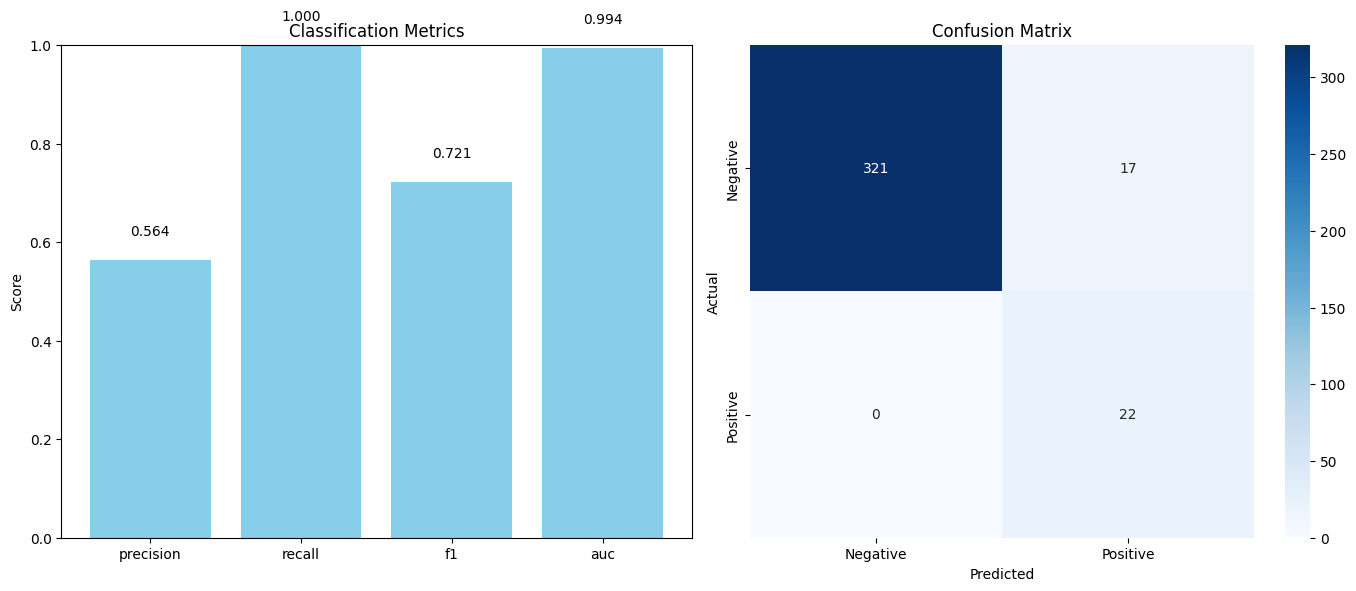

In [15]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pytorch_forecasting import TimeSeriesDataSet

def evaluate_binary_classification_model(model, validation_dataloader, actual_data=None):
    """
    Evaluate a binary classification model using standard metrics
    
    Args:
        model: The trained PyTorch Lightning model
        validation_dataloader: DataLoader for validation data
        actual_data: Optional DataFrame with actual values for comparison
    
    Returns:
        Dictionary with evaluation metrics and prediction results
    """
    # Set model to evaluation mode
    model.eval()
    
    # Generate predictions
    with torch.no_grad():
        predictions = []
        targets = []
        
        for x, y in validation_dataloader:
            # Forward pass
            output = model(x)
            pred = output["prediction"]
            target = y[0]  # Extract target from tuple
            
            # Store predictions and targets
            predictions.append(pred)
            targets.append(target)
        
        # Concatenate predictions and targets
        predictions = torch.cat(predictions, dim=0)
        targets = torch.cat(targets, dim=0)
        
        # Apply sigmoid to get probabilities
        probabilities = torch.sigmoid(predictions)
        
        # Convert to numpy arrays for sklearn metrics
        # Shape: [batch_size, prediction_length, 1]
        # We need to reshape to [batch_size * prediction_length]
        prob_numpy = probabilities.cpu().numpy().reshape(-1)
        target_numpy = targets.cpu().numpy().reshape(-1)
        
        # Convert probabilities to binary predictions using 0.5 threshold
        binary_pred = (prob_numpy > 0.5).astype(int)
        
        # Calculate metrics
        metrics = {
            "precision": precision_score(target_numpy, binary_pred, zero_division=0),
            "recall": recall_score(target_numpy, binary_pred, zero_division=0),
            "f1": f1_score(target_numpy, binary_pred, zero_division=0),
            "auc": roc_auc_score(target_numpy, prob_numpy) if len(np.unique(target_numpy)) > 1 else float('nan')
        }
        
        # Calculate confusion matrix
        cm = confusion_matrix(target_numpy, binary_pred)
        
        return {
            "metrics": metrics,
            "confusion_matrix": cm,
            "predictions": predictions,
            "probabilities": probabilities,
            "targets": targets
        }

def extract_predictions_with_metadata(model, prediction_dataset, prediction_dataloader, start_date):
    """
    Extract predictions with category and date information
    
    Args:
        model: Trained PyTorch Lightning model
        prediction_dataset: TimeSeriesDataSet for predictions
        prediction_dataloader: DataLoader for predictions
        start_date: Reference start date for time index conversion
        
    Returns:
        DataFrame with predictions and metadata
    """
    # Set model to evaluation mode
    model.eval()
    
    # Get predictions
    trainer_predictions = model.trainer.predict(model, dataloaders=prediction_dataloader)
    
    # Extract and process predictions
    raw_predictions = torch.cat([x["prediction"] for x in trainer_predictions], dim=0)
    probabilities = torch.sigmoid(raw_predictions).cpu().numpy()
    binary_predictions = (probabilities > 0.5).astype(int)
    
    # Get metadata from the prediction dataset
    x, _ = next(iter(prediction_dataset.to_dataloader(train=False, batch_size=len(prediction_dataset))))
    
    # Get group mappings
    category_mapping = prediction_dataset.categorical_encoders["Category"].classes_
    
    # Create prediction results
    prediction_results = []
    
    # Process each sample
    for i in range(probabilities.shape[0]):
        # Get category information
        category_idx = x["groups"][i][0].item()
        category_name = category_mapping[category_idx]
        
        # Get time indices for this sample
        encoder_time_idx = x["encoder_time_idx"][i][-1].item()  # Last encoder time index
        
        # Process each prediction step
        for j in range(probabilities.shape[1]):
            # Calculate the date for this prediction step
            time_idx = encoder_time_idx + j + 1
            date = start_date + timedelta(days=time_idx)
            
            # Get prediction values
            prob = probabilities[i, j, 0]
            binary_pred = binary_predictions[i, j, 0]
            
            # Store the result
            prediction_results.append({
                'Category': category_name,
                'Date': date,
                'time_idx': time_idx,
                'Probability': float(prob),
                'Predicted_Occurrence': int(binary_pred)
            })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(prediction_results)
    return results_df

def visualize_evaluation_results(evaluation_results):
    """
    Visualize evaluation metrics and confusion matrix
    
    Args:
        evaluation_results: Dictionary with evaluation metrics
    """
    metrics = evaluation_results["metrics"]
    cm = evaluation_results["confusion_matrix"]
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot metrics
    metric_names = list(metrics.keys())
    metric_values = [metrics[m] for m in metric_names]
    
    ax1.bar(metric_names, metric_values, color='skyblue')
    ax1.set_ylim(0, 1)
    ax1.set_title('Classification Metrics')
    ax1.set_ylabel('Score')
    for i, v in enumerate(metric_values):
        ax1.text(i, v + 0.05, f'{v:.3f}', ha='center')
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

def evaluate_predictions_by_category(prediction_results, actual_data=None, date_column='Date', category_column='Category', target_column='Payments_Indicator'):
    """
    Evaluate predictions by category
    
    Args:
        prediction_results: DataFrame with predictions
        actual_data: DataFrame with actual values (optional)
        date_column: Column name for dates
        category_column: Column name for categories
        target_column: Column name for the target variable
        
    Returns:
        DataFrame with evaluation metrics by category
    """
    if actual_data is None:
        return pd.DataFrame()
    
    # Ensure date columns are datetime
    prediction_results[date_column] = pd.to_datetime(prediction_results[date_column])
    actual_data[date_column] = pd.to_datetime(actual_data[date_column])
    
    # Merge predictions with actual data
    merged_data = prediction_results.merge(
        actual_data[[date_column, category_column, target_column]],
        on=[date_column, category_column],
        how='inner'
    )
    
    # Calculate metrics by category
    categories = merged_data[category_column].unique()
    category_metrics = []
    
    for category in categories:
        cat_data = merged_data[merged_data[category_column] == category]
        
        # Skip categories with insufficient data
        if len(cat_data) < 10 or cat_data[target_column].nunique() < 2:
            continue
        
        # Calculate metrics
        precision = precision_score(cat_data[target_column], cat_data['Predicted_Occurrence'], zero_division=0)
        recall = recall_score(cat_data[target_column], cat_data['Predicted_Occurrence'], zero_division=0)
        f1 = f1_score(cat_data[target_column], cat_data['Predicted_Occurrence'], zero_division=0)
        
        try:
            auc = roc_auc_score(cat_data[target_column], cat_data['Probability'])
        except:
            auc = np.nan
        
        category_metrics.append({
            'Category': category,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'AUC': auc,
            'Count': len(cat_data)
        })
    
    return pd.DataFrame(category_metrics).sort_values('F1', ascending=False)

# Example usage:

# 1. First, evaluate model performance on validation data
def evaluate_model_pipeline(model, validation_dataset, validation_dataloader, test_data=None):
    """
    Complete pipeline for model evaluation and prediction extraction
    
    Args:
        model: Trained PyTorch Lightning model
        validation_dataset: TimeSeriesDataSet for validation
        validation_dataloader: DataLoader for validation
        start_date: Reference start date for time index conversion
        test_data: Optional DataFrame with test data for comparison
        
    Returns:
        Tuple of (evaluation_results, prediction_results)
    """
    # Evaluate model performance
    print("Evaluating model performance...")
    evaluation_results = evaluate_binary_classification_model(model, validation_dataloader)
    
    print(f"Model Performance Metrics:")
    for metric, value in evaluation_results["metrics"].items():
        print(f"- {metric}: {value:.4f}")
    
    # # Extract predictions with metadata
    # print("\nExtracting predictions with metadata...")
    # prediction_results = extract_predictions_with_metadata(
    #     model, validation_dataset, validation_dataloader, start_date
    # )
    
    # print(f"Generated {len(prediction_results)} predictions")
    # print(f"Sample predictions:")
    # print(prediction_results.head())
    
    # # If test data is provided, evaluate by category
    # if test_data is not None:
    #     print("\nEvaluating predictions by category...")
    #     category_metrics = evaluate_predictions_by_category(prediction_results, test_data)
    #     print("Top performing categories:")
    #     print(category_metrics.head())
    
    # Visualize evaluation metrics
    visualize_evaluation_results(evaluation_results)
    
    return evaluation_results, prediction_results

# How to use the functions:

# First, ensure your validation dataset and dataloader are properly set up

# Reference start date (minimum date in your dataset)
# start_date = expense_data_set["Date"].min()  # Recreate this from your time_idx

# Now evaluate the model and extract predictions
# evaluation_results, prediction_results = evaluate_model_pipeline(
#     best_model_lightning_occurrence,
#     validation_data_occurrence,
#     val_dataloader_occurrence,
#     test_data=expense_data_set  # Optional: provide actual data for comparison
# )
evaluation_results, prediction_results = evaluate_model_pipeline(
    best_model_lightning_occurrence_loaded,
    validation_data_occurrence,
    val_dataloader_occurrence,
    test_data=expense_data_set  # Optional: provide actual data for comparison
)


In [16]:
import optuna
from optuna.trial import FrozenTrial

study_amount = optuna.create_study(direction="minimize")
trial = optuna.trial.create_trial(
    params={'hidden_size': 131, 'lstm_layers': 2, 'num_attention_heads': 4, 'dropout': 0.2480095402839853, 'learning_rate': 0.0018651711459711253, 'max_epochs': 128},
    distributions={
        'hidden_size': optuna.distributions.IntDistribution(32, 256),
        'lstm_layers': optuna.distributions.IntDistribution(1, 3),
        'num_attention_heads': optuna.distributions.IntDistribution(2, 8),
        'dropout': optuna.distributions.FloatDistribution(0.1, 0.5),
        'learning_rate': optuna.distributions.FloatDistribution(1e-5, 1e-2, log=True),
        'max_epochs': optuna.distributions.IntDistribution(50, 500),
    },
    value=1006623.4919508616
)
study_amount.add_trial(trial)



[I 2025-06-02 15:50:37,949] A new study created in memory with name: no-name-a7f970e4-a681-4a1c-939d-e7069ca50648


In [17]:
expense_data_set_path=r'finalized_dataset_with_embeddings.xlsx'
expense_data_set_amount=pd.read_excel(expense_data_set_path)
expense_data_set_amount=expense_data_set_amount.drop(columns=['Cluster'])
expense_data_set_amount.head()

,Date,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions
0,2022-11-06,0.0,Uncategorized,9424.64,-0.781831,0.62349,-0.5,0.866025,2145.357143,-2145.357143,0,19.0,685.833333,0.0,0,0.0,0.0,19.0
1,2022-11-06,6030.0,NADIL OTHBNK T,12454.64,-0.781831,0.62349,-0.5,0.866025,5859.090909,170.909091,1,12.0,4670.000000,0.0,1,6030.0,0.0,12.0
2,2022-11-06,3030.0,OTHBNK T,9424.64,-0.781831,0.62349,-0.5,0.866025,3780.000000,-750.000000,1,103.0,4030.000000,0.0,1,3030.0,0.0,103.0
3,2022-11-06,0.0,RIBRMB SECH IBMB CHARGE,9424.64,-0.781831,0.62349,-0.5,0.866025,40.000000,-40.000000,0,54.0,40.000000,0.0,0,0.0,0.0,135.0
4,2022-11-06,0.0,CSH WDR,9424.64,-0.781831,0.62349,-0.5,0.866025,7735.000000,-7735.000000,0,1.0,11408.333333,0.0,0,0.0,0.0,1.0


In [18]:
expense_data_set_amount['Date'] = pd.to_datetime(expense_data_set_amount['Date'])
expense_data_set_amount['Category'] = expense_data_set_amount['Category'].astype(str)
expense_data_set_amount = expense_data_set_amount.sort_values(by=['Category', 'Date'])
# Create integer time index (e.g., days since the first date)
expense_data_set_amount['time_idx'] = (
    expense_data_set_amount['Date'] - expense_data_set_amount['Date'].min()
).dt.days
expense_data_set_amount=expense_data_set_amount.drop(columns=['Date'])



In [19]:
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.data.encoders import EncoderNormalizer
# --- TFT Pipeline 2: Amount Prediction ---

class NonZeroLossAmount(nn.Module):
    def __init__(self,zero_weight,pos_weight):
        super().__init__()
        self.mse = nn.MSELoss(reduction='none')
        self.zero_weight = zero_weight
        self.pos_weight = pos_weight

    def forward(self, y_pred, y_true):
        # element_wise_mse = self.mse(y_pred, y_true)
        
        # # Create masks for zero and non-zero values
        # zero_mask = (y_true == 0).float()
        # non_zero_mask = (y_true > 0).float()
        
        # # Weight the losses differently
        # weighted_zero_loss = self.zero_weight * torch.mean(element_wise_mse * zero_mask)
        # weighted_non_zero_loss = self.pos_weight * torch.mean(element_wise_mse * non_zero_mask)
        
        # # Combine the losses
        # total_loss = weighted_zero_loss + weighted_non_zero_loss
        # return total_loss
        mse = (y_pred - y_true) ** 2

        weights = torch.where(y_true == 0, 
                              torch.tensor(self.zero_weight, device=y_true.device), 
                              torch.tensor(self.pos_weight, device=y_true.device))
        
        weighted_loss = mse * weights
        return weighted_loss.mean()
continuous_features_amount =['Payments_Indicator','Balance','Days_Since_Last_Transaction','Payments_Deviation', 'Cluster_NonZero_Mean', 'Transactions_Past_60_Days', 'Average_Payment', 'Transactions_Upto_Date','Max_Amount_Past_60_Days','Min_Non_Zero_Amount_Past_60_Days','Avg_Days_Between_Transactions']


scaler = MinMaxScaler()

# Apply min-max scaling to the continuous features
# expense_data_set_amount[continuous_features_amount] = scaler.fit_transform(
#     expense_data_set_amount[continuous_features_amount]
# )

def min_max_scaling(group):
    min_vals = group.min()
    max_vals = group.max()
    range_vals = max_vals - min_vals
    # Avoid division by zero
    if np.isscalar(range_vals):
        if range_vals == 0:
            range_vals = 1
    else:
        range_vals[range_vals == 0] = 1
    return (group - min_vals) / range_vals

group_column = "Category"
expense_data_set_amount[continuous_features_amount] = (
    expense_data_set_amount.groupby(group_column)[continuous_features_amount]
    .transform(min_max_scaling)
)

# Create TimeSeriesDataSet for amount prediction
training_data_amount = TimeSeriesDataSet(
    expense_data_set_amount,
    time_idx="time_idx",
    target="Payments",
    group_ids=["Category"],
    static_categoricals=["Category"],
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=continuous_features_amount,
    target_normalizer=GroupNormalizer(groups=["Category"]),
    scalers=None,
    max_encoder_length=90,
    max_prediction_length=30,
)
print("target normalizer :",training_data_amount.target_normalizer)
validation_data_amount = TimeSeriesDataSet.from_dataset(
    training_data_amount,
    expense_data_set_amount,
    predict=True,
    stop_randomization=True,
)

train_dataloader_amount = training_data_amount.to_dataloader(train=True, batch_size=64)
val_dataloader_amount = validation_data_amount.to_dataloader(train=False, batch_size=64)

# --- Hyperparameter Optimization for Amount Prediction ---
def objective_amount(trial):
    hidden_size = trial.suggest_int("hidden_size", 32, 256)
    lstm_layers = trial.suggest_int("lstm_layers", 1, 3)
    num_attention_heads = trial.suggest_int("num_attention_heads", 2, 8)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    max_epochs = trial.suggest_int("max_epochs", 50, 500) # Tune max epochs

    num_positive_amount = expense_data_set_amount['Payments_Indicator'].sum()
    num_negative_amount = len(expense_data_set_amount) - num_positive_amount
    pos_weight_amount = torch.tensor([num_negative_amount / (num_positive_amount + 1e-6)])

    class TFTLightningModuleAmount(pl.LightningModule):
        def __init__(self, model, learning_rate,pos_weight_amount,max_prediction_length):
            super().__init__()
            self.model = model
            self.learning_rate = learning_rate
            self.pos_weight_amount=pos_weight_amount
            self.loss_fn = NonZeroLossAmount(1,pos_weight=self.pos_weight_amount)
            self.max_prediction_length = max_prediction_length

        def forward(self, x):
            return self.model(x)

        def predict_step(self, batch, batch_idx):
            x, y = batch  # Unpack the batch tuple
            return {"prediction": self(x)["prediction"]}

        def training_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self(x)["prediction"]  # properly extract predictions
            target = y[0].type(torch.FloatTensor) 
            # Adjust shapes to match
            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]
            loss = self.loss_fn(y_hat, target)
            #self.log("train_loss", loss)
            self.log("train_loss", loss, prog_bar=True, logger=True)

            # # Print progress
            # if batch_idx % 10 == 0:  # print every 10 batches
            #     print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
            #     print(f"Epoch {self.current_epoch}")
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch

            y_hat = self(x)["prediction"]
            
            target = y[0].type(torch.FloatTensor)   
    
            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]

            loss = self.loss_fn(y_hat, target)
            self.log("val_loss", loss, prog_bar=True)
            # if batch_idx % 10 == 0:  # print every 10 batches
            #     print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
            return loss

        def configure_optimizers(self):
            return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

        def predict_with_uncertainty(self, dataloader, num_samples=30):
            self.model.train()  # Set to train mode to enable dropout
            
            # Store all batch predictions
            all_predictions = []
            all_x_data = []
            
            # First, collect all input batches to reuse them
            for x, _ in dataloader:
                all_x_data.append(x)
            
            # For each MC sample
            for sample_idx in range(num_samples):
                batch_predictions = []
                
                # Process each batch
                for x in all_x_data:
                    with torch.no_grad():
                        output = self(x)
                        batch_predictions.append(output["prediction"])
                
                # Concatenate all batches for this MC sample
                sample_predictions = torch.cat(batch_predictions, dim=0)
                all_predictions.append(sample_predictions.detach().cpu().numpy())
            
            # Stack all samples - shape will be [num_samples, total_samples, prediction_length, output_size]
            all_predictions = np.stack(all_predictions)
            
            # Compute statistics across the sample dimension (axis=0)
            mean_predictions = np.mean(all_predictions, axis=0)
            lower_bounds = np.percentile(all_predictions, 10, axis=0)
            upper_bounds = np.percentile(all_predictions, 90, axis=0)
            uncertainties = upper_bounds - lower_bounds
            
            return {
                "prediction": mean_predictions,
                "lower_bound": lower_bounds,
                "upper_bound": upper_bounds,
                "uncertainty": uncertainties,
                "x_data": all_x_data  # Return this to access metadata later
            }
        
        def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
            """
            Provides detailed feature importance for a specific prediction horizon.
            This function specifically targets a single day in the forecast.
            
            Args:
                x: Input data dictionary with model inputs
                category_name: Name of the category being predicted
                feature_names: List of feature names corresponding to the input features
                horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)
                
            Returns:
                Dictionary with explanation details specific to that horizon
            """
            # Put model in eval mode
            self.model.eval()
            
            # Debug info
            print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")
            
            try:
                with torch.no_grad():
                    # Forward pass
                    outputs = self.model(x)
                    
                    # Get interpretation data specifically for this horizon
                    interp_data = self.model.interpret_output(
                        outputs, 
                        reduction="none",
                        attention_prediction_horizon=horizon_index
                    )
                
                    # Extract raw importance values
                    encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                    decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]
                    
                    # For encoder importances, average across all encoder time steps
                    if encoder_variables.ndim == 0:
                        encoder_avg = np.array([float(encoder_variables)])
                    elif encoder_variables.ndim == 1:
                        encoder_avg = encoder_variables
                    else:
                        encoder_avg = np.mean(encoder_variables, axis=0)
                    
                    # For decoder importances, focus on the specific horizon we're interested in
                    if decoder_variables.ndim == 0:
                        decoder_importance = np.array([float(decoder_variables)])
                    elif decoder_variables.ndim == 1:
                        decoder_importance = decoder_variables
                    else:
                        # If we can extract the specific horizon's importance, do that
                        if horizon_index < decoder_variables.shape[0]:
                            decoder_importance = decoder_variables[horizon_index]
                        else:
                            # Otherwise use the last available horizon
                            decoder_importance = decoder_variables[-1]
                    
                        # Convert scalar to array if needed
                        if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                            decoder_importance = np.array([float(decoder_importance)])
                    
                    # Process arrays to ensure they have proper dimensions
                    if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                        encoder_avg = np.array([float(encoder_avg)])
                    
                    if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])
                    
                    # Ensure dimensions align
                    feature_count = len(feature_names)
                    encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                    decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1
                    
                    min_features = min(encoder_count, decoder_count, feature_count)
                    
                    # Truncate to matching dimensions
                    encoder_avg = encoder_avg[:min_features]
                    decoder_importance = decoder_importance[:min_features]
                    features_used = feature_names[:min_features]
                    
                    # Calculate combined importance - weight decoder more heavily for binary classification
                    combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance
                    
                    # Normalize to get percentages
                    total = np.sum(combined_importance)
                    if total > 0:
                        combined_importance = combined_importance / total
                    
                    # Create feature importance dictionary
                    feature_importance = dict(zip(features_used, combined_importance))
                    
                    # Sort features by importance
                    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
                    
                    # Return the explanation details
                    return {
                        "all_features": dict(sorted_features),
                        "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                        "raw_encoder_importance": encoder_avg.tolist(),
                        "raw_decoder_importance": decoder_importance.tolist(),
                        "is_valid": True
                    }
                    
            except Exception as e:
                print(f"Error in explain_prediction_for_horizon: {e}")
                import traceback
                traceback.print_exc()
                
                # Return a fallback explanation
                return {
                    "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                    "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                    "is_valid": False,
                    "error": str(e)
                }
    modelamount = TemporalFusionTransformer.from_dataset(
        training_data_amount,
        output_size=1,
        hidden_size=hidden_size,
        lstm_layers=lstm_layers,
        attention_head_size=num_attention_heads,
        dropout=dropout,
        learning_rate=learning_rate,
    )
    lightning_model_amount = TFTLightningModuleAmount(modelamount,learning_rate,pos_weight_amount,training_data_amount.max_prediction_length)
    early_stopping_callback_amount = EarlyStopping(monitor="val_loss", patience=5, mode="min")
    callbacks_amount = [early_stopping_callback_amount]

    trainer = pl.Trainer(
        max_epochs=max_epochs,
        accelerator="auto",
        callbacks=callbacks_amount,
        logger=TensorBoardLogger("lightning_logs", name="tft_amount_optuna"),
    )

    trainer.fit(lightning_model_amount, train_dataloaders=train_dataloader_amount, val_dataloaders=val_dataloader_amount)
    # val_loss = trainer.validate(lightning_model, dataloaders=val_dataloader_occurrence, verbose=False)['val_loss']
    validation_results = trainer.validate(lightning_model_amount, dataloaders=val_dataloader_amount, verbose=False)
    val_loss = validation_results[0]['val_loss']
    return val_loss

# study_amount = optuna.create_study(direction="minimize")
# study_amount.optimize(objective_amount, n_trials=10) # Adjust n_trials as needed

print("\nAmount Prediction Optimization Results:")
print(f"Best trial value: {study_amount.best_trial.value}")
print(f"Best trial params: {study_amount.best_trial.params}")



target normalizer : GroupNormalizer(
	method='standard',
	groups=['Category'],
	center=True,
	scale_by_group=False,
	transformation=None,
	method_kwargs={}
)

Amount Prediction Optimization Results:
Best trial value: 1006623.4919508616
Best trial params: {'hidden_size': 131, 'lstm_layers': 2, 'num_attention_heads': 4, 'dropout': 0.2480095402839853, 'learning_rate': 0.0018651711459711253, 'max_epochs': 128}


In [20]:
expense_data_set_2tft_path=r'finalized_dataset_with_embeddings.xlsx'
expense_data_set_2tft=pd.read_excel(expense_data_set_2tft_path)

expense_data_set_2tft.head()

,Date,Cluster,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions
0,2022-11-06,-1,0.0,Uncategorized,9424.64,-0.781831,0.62349,-0.5,0.866025,2145.357143,-2145.357143,0,19.0,685.833333,0.0,0,0.0,0.0,19.0
1,2022-11-06,0,6030.0,NADIL OTHBNK T,12454.64,-0.781831,0.62349,-0.5,0.866025,5859.090909,170.909091,1,12.0,4670.000000,0.0,1,6030.0,0.0,12.0
2,2022-11-06,1,3030.0,OTHBNK T,9424.64,-0.781831,0.62349,-0.5,0.866025,3780.000000,-750.000000,1,103.0,4030.000000,0.0,1,3030.0,0.0,103.0
3,2022-11-06,2,0.0,RIBRMB SECH IBMB CHARGE,9424.64,-0.781831,0.62349,-0.5,0.866025,40.000000,-40.000000,0,54.0,40.000000,0.0,0,0.0,0.0,135.0
4,2022-11-06,3,0.0,CSH WDR,9424.64,-0.781831,0.62349,-0.5,0.866025,7735.000000,-7735.000000,0,1.0,11408.333333,0.0,0,0.0,0.0,1.0


In [21]:
occurrence_lookup = {
    (row['Date'].date(), row['Category']): row['Predicted_Occurrence']
    for row in prediction_results
}
print(occurrence_lookup)

{(datetime.date(2025, 2, 1), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 2), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 3), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 4), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 5), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 6), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 7), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 8), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 9), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 10), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 11), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 12), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025, 2, 13), np.str_('AB ATM WITHDRAWALNOV')): np.int32(0), (datetime.date(2025,

In [22]:
import numpy as np

expense_data_set_2tft['time_idx'] = (
    expense_data_set_2tft['Date'] - expense_data_set_2tft['Date'].min()
).dt.days

#//////////////////////////////////////////////////////////////
expense_data_set_2tft[continuous_features_amount] = (
    expense_data_set_2tft.groupby(group_column)[continuous_features_amount]
    .transform(min_max_scaling)
)
payment_days_data_amount = expense_data_set_2tft[expense_data_set_2tft['Payments_Indicator'] > 0].copy()
category_averages_on_payment_days_amount = payment_days_data_amount.groupby('Category')[continuous_features_amount].mean()
        
print("\namount prediction Category-wise Averages of SCALED features on Payment Days (Payments_Indicator > 0):")
print(category_averages_on_payment_days_amount)
# continuous_features_occurrence =['Payments','Balance','Days_Since_Last_Transaction','Payments_Deviation', 'Cluster_NonZero_Mean', 'Transactions_Past_60_Days', 'Average_Payment', 'Transactions_Upto_Date','Max_Amount_Past_60_Days','Min_Non_Zero_Amount_Past_60_Days','Avg_Days_Between_Transactions']
# continuous_features_amount =['Payments_Indicator','Balance','Days_Since_Last_Transaction','Payments_Deviation', 'Cluster_NonZero_Mean', 'Transactions_Past_60_Days', 'Average_Payment', 'Transactions_Upto_Date','Max_Amount_Past_60_Days','Min_Non_Zero_Amount_Past_60_Days','Avg_Days_Between_Transactions']

#/////////////////////////////////////////////////////////////
last_date_amount = expense_data_set_2tft['Date'].max()
    
# Get the list of unique categories in order of appearance
last_day_categories_amount = expense_data_set_2tft[expense_data_set_2tft['Date'] == last_date_amount]['Category'].tolist()

# Create future dates
future_dates_amount = pd.date_range(start=last_date_amount + pd.Timedelta(days=1), periods=30)

# Create future data with the same categories repeating
future_data_amount = []

for date in future_dates_amount:
    for category in last_day_categories_amount:
        # Get the last row for this category to copy some values
        last_category_row = expense_data_set_2tft[expense_data_set_2tft['Category'] == category].iloc[-1]
        predicted_occurrence = occurrence_lookup.get((date.date(), category), 0)
        future_data_amount.append({
            'Date': date,
            'Category': category,
            'Cluster': last_category_row['Cluster'],  # Keep original Cluster
            'time_idx': expense_data_set_2tft['time_idx'].max() + (date - last_date_amount).days,
            'DayOfWeek_Sin': np.sin(date.dayofweek * (2 * np.pi / 7)),
            'DayOfWeek_Cos': np.cos(date.dayofweek * (2 * np.pi / 7)),
            'Month_Sin': np.sin(date.month * (2 * np.pi / 12)),
            'Month_Cos': np.cos(date.month * (2 * np.pi / 12)),
            'Payments_Indicator': predicted_occurrence,
            'Payments':0,
            'Balance': category_averages_on_payment_days_amount.loc[ category, 'Balance'],
            'Days_Since_Last_Transaction': category_averages_on_payment_days_amount.loc[ category, 'Days_Since_Last_Transaction'],
            'Payments_Deviation': category_averages_on_payment_days_amount.loc[ category, 'Payments_Deviation'],
            'Cluster_NonZero_Mean': category_averages_on_payment_days_amount.loc[ category, 'Cluster_NonZero_Mean'],
            'Transactions_Past_60_Days': category_averages_on_payment_days_amount.loc[ category, 'Transactions_Past_60_Days'],
            'Average_Payment': category_averages_on_payment_days_amount.loc[ category, 'Average_Payment'],
            'Transactions_Upto_Date': category_averages_on_payment_days_amount.loc[ category, 'Transactions_Upto_Date'],
            'Max_Amount_Past_60_Days': category_averages_on_payment_days_amount.loc[ category, 'Max_Amount_Past_60_Days'],
            'Min_Non_Zero_Amount_Past_60_Days': category_averages_on_payment_days_amount.loc[ category, 'Min_Non_Zero_Amount_Past_60_Days'],
            'Avg_Days_Between_Transactions': category_averages_on_payment_days_amount.loc[ category, 'Avg_Days_Between_Transactions'],
        })

# Create dataframe with future data
future_df_amount = pd.DataFrame(future_data_amount)
# Create mapping for result usage
time_idx_to_date_amount = future_df_amount[['time_idx', 'Date']].drop_duplicates().set_index('time_idx')['Date'].to_dict()

# Combine with historical data
prediction_data_amount = pd.concat([expense_data_set_2tft, future_df_amount], ignore_index=True)
prediction_data_amount=prediction_data_amount.drop(columns=['Date','Cluster'])
print(prediction_data_amount)


amount prediction Category-wise Averages of SCALED features on Payment Days (Payments_Indicator > 0):
                              Payments_Indicator   Balance  Days_Since_Last_Transaction  Payments_Deviation  Cluster_NonZero_Mean  Transactions_Past_60_Days  Average_Payment  Transactions_Upto_Date  Max_Amount_Past_60_Days  Min_Non_Zero_Amount_Past_60_Days  Avg_Days_Between_Transactions
Category                                                                                                                                                                                                                                                                                       
AB ATM WITHDRAWALNOV                         1.0  0.313827                     0.286164            0.463440                   0.0                   0.222222         0.803704                0.583333                 0.178064                          0.148461                       0.540948
ATM WITHDRAWAL WDR               

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:
pd.set_option('display.max_rows', None)

# Optional: to show all columns too
pd.set_option('display.max_columns', None)

# Optional: to avoid row wrapping
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
prediction_data_amount.tail(300)

,Payments,Category,Balance,DayOfWeek_Sin,DayOfWeek_Cos,Month_Sin,Month_Cos,Cluster_NonZero_Mean,Payments_Deviation,Payments_Indicator,Days_Since_Last_Transaction,Average_Payment,Transactions_Past_60_Days,Transactions_Upto_Date,Max_Amount_Past_60_Days,Min_Non_Zero_Amount_Past_60_Days,Avg_Days_Between_Transactions,time_idx
9876,0.0,Uncategorized,0.072926,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.332614,0.0,0.481366,0.204587,0.190476,0.571429,0.133278,0.111296,0.458041,823
9877,0.0,NADIL OTHBNK T,0.602939,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.505966,0.0,0.026240,0.330383,0.490909,0.500000,0.647119,0.271079,0.362823,823
9878,0.0,OTHBNK T,0.670374,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.751491,0.0,0.073093,0.000000,0.250000,0.500000,0.600895,0.500000,0.585821,823
9879,0.0,RIBRMB SECH IBMB CHARGE,0.180268,0.433884,-0.900969,0.866025,5.000000e-01,0.0,1.000000,0.0,0.594340,0.000000,0.916667,0.520833,0.916667,0.916667,0.206485,823
9880,0.0,CSH WDR,0.812470,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.402341,0.0,0.016524,0.883412,0.400000,0.600000,0.608062,0.477000,0.582184,823
9881,0.0,WH TAX,0.265172,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.304309,0.0,0.978667,0.359086,0.960000,0.520000,0.301908,0.302328,0.798555,823
9882,0.0,AB ATM WITHDRAWALNOV,0.313827,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.463440,0.0,0.286164,0.803704,0.222222,0.583333,0.178064,0.148461,0.540948,823
9883,0.0,ATM WITHDRAWAL WDR,0.132900,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.449715,1.0,0.094056,0.357152,0.581536,0.502959,0.816736,0.166033,0.083786,823
9884,0.0,FUND TRANSFER,0.120274,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.299076,0.0,0.151058,0.397932,0.534028,0.505556,0.856228,0.340454,0.083416,823
9885,0.0,POINT OF SALE TRNS,0.133835,0.433884,-0.900969,0.866025,5.000000e-01,0.0,0.530052,0.0,0.627976,1.000000,0.000000,0.625000,0.000000,0.000000,0.568667,823


In [24]:
num_positive_amount = expense_data_set_amount['Payments_Indicator'].sum()
num_negative_amount = len(expense_data_set_amount) - num_positive_amount
pos_weight_amount = torch.tensor([num_negative_amount / (num_positive_amount + 1e-6)])

# # Train the best model 
best_model_amount = TemporalFusionTransformer.from_dataset(
     training_data_amount,
     output_size=1,
     **{k: v for k, v in study_amount.best_trial.params.items() if k not in ['max_epochs', 'num_attention_heads']},  # Exclude num_attention_heads
     attention_head_size=study_amount.best_trial.params.get('num_attention_heads', 4)
)

class BestModelAmountLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate,pos_weight_amount,max_prediction_length):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.pos_weight_amount=pos_weight_amount
        self.loss_fn = NonZeroLossAmount(1,pos_weight=self.pos_weight_amount)
        self.max_prediction_length = max_prediction_length

        
    def forward(self, x):
        return self.model(x)

        

    def predict_step(self, batch, batch_idx):
        x, y = batch  # Unpack the batch tuple
        return {"prediction": self(x)["prediction"]}

        

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)["prediction"]  # properly extract predictions
        target = y[0].type(torch.FloatTensor) 
        # Adjust shapes to match
        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]
        loss = self.loss_fn(y_hat, target)
        #self.log("train_loss", loss)
        self.log("train_loss", loss, prog_bar=True, logger=True)

        # Print progress
        # if batch_idx % 10 == 0:  # print every 10 batches
        #     print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
        #     print(f"Epoch {self.current_epoch}")
        return loss

        
    def validation_step(self, batch, batch_idx):
        x, y = batch

        y_hat = self(x)["prediction"]
        
        target = y[0].type(torch.FloatTensor)   

        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]

        loss = self.loss_fn(y_hat, target)
        self.log("val_loss", loss, prog_bar=True)
        # if batch_idx % 10 == 0:  # print every 10 batches
        #     print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)
    
    def predict_with_uncertainty(self, dataloader, num_samples=30):
        self.model.train()  # Set to train mode to enable dropout
        
        # Store all batch predictions
        all_predictions = []
        all_x_data = []
        
        # First, collect all input batches to reuse them
        for x, _ in dataloader:
            all_x_data.append(x)
        
        # For each MC sample
        for sample_idx in range(num_samples):
            batch_predictions = []
            
            # Process each batch
            for x in all_x_data:
                with torch.no_grad():
                    output = self(x)
                    batch_predictions.append(output["prediction"])
            
            # Concatenate all batches for this MC sample
            sample_predictions = torch.cat(batch_predictions, dim=0)
            all_predictions.append(sample_predictions.detach().cpu().numpy())
        
        # Stack all samples - shape will be [num_samples, total_samples, prediction_length, output_size]
        all_predictions = np.stack(all_predictions)
        
        # Compute statistics across the sample dimension (axis=0)
        mean_predictions = np.mean(all_predictions, axis=0)
        lower_bounds_10 = np.percentile(all_predictions, 10, axis=0)
        upper_bounds_90 = np.percentile(all_predictions, 90, axis=0)
        uncertainties_80 = lower_bounds_10 - upper_bounds_90

        
        return {
            "prediction": mean_predictions,
            "lower_bound": lower_bounds_10,
            "upper_bound": upper_bounds_90,
            "uncertainty": uncertainties_80,
            "x_data": all_x_data  # Return this to access metadata later
        }
    def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
        """
        Provides detailed feature importance for a specific prediction horizon.
        This function specifically targets a single day in the forecast.
        
        Args:
            x: Input data dictionary with model inputs
            category_name: Name of the category being predicted
            feature_names: List of feature names corresponding to the input features
            horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)
            
        Returns:
            Dictionary with explanation details specific to that horizon
        """
        # Put model in eval mode
        self.model.eval()
        
        # Debug info
        print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")
        
        try:
            with torch.no_grad():
                # Forward pass
                outputs = self.model(x)
                
                # Get interpretation data specifically for this horizon
                interp_data = self.model.interpret_output(
                    outputs, 
                    reduction="none",
                    attention_prediction_horizon=horizon_index
                )
            
                # Extract raw importance values
                encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]
                
                # For encoder importances, average across all encoder time steps
                if encoder_variables.ndim == 0:
                    encoder_avg = np.array([float(encoder_variables)])
                elif encoder_variables.ndim == 1:
                    encoder_avg = encoder_variables
                else:
                    encoder_avg = np.mean(encoder_variables, axis=0)
                
                # For decoder importances, focus on the specific horizon we're interested in
                if decoder_variables.ndim == 0:
                    decoder_importance = np.array([float(decoder_variables)])
                elif decoder_variables.ndim == 1:
                    decoder_importance = decoder_variables
                else:
                    # If we can extract the specific horizon's importance, do that
                    if horizon_index < decoder_variables.shape[0]:
                        decoder_importance = decoder_variables[horizon_index]
                    else:
                        # Otherwise use the last available horizon
                        decoder_importance = decoder_variables[-1]
                
                    # Convert scalar to array if needed
                    if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])
                
                # Process arrays to ensure they have proper dimensions
                if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                    encoder_avg = np.array([float(encoder_avg)])
                
                if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                    decoder_importance = np.array([float(decoder_importance)])
                
                # Ensure dimensions align
                feature_count = len(feature_names)
                encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1
                
                min_features = min(encoder_count, decoder_count, feature_count)
                
                # Truncate to matching dimensions
                encoder_avg = encoder_avg[:min_features]
                decoder_importance = decoder_importance[:min_features]
                features_used = feature_names[:min_features]
                
                # Calculate combined importance - weight decoder more heavily for binary classification
                combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance
                
                # Normalize to get percentages
                total = np.sum(combined_importance)
                if total > 0:
                    combined_importance = combined_importance / total
                
                # Create feature importance dictionary
                feature_importance = dict(zip(features_used, combined_importance))
                
                # Sort features by importance
                sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
                
                # Return the explanation details
                return {
                    "all_features": dict(sorted_features),
                    "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                    "raw_encoder_importance": encoder_avg.tolist(),
                    "raw_decoder_importance": decoder_importance.tolist(),
                    "is_valid": True
                }
                
        except Exception as e:
            print(f"Error in explain_prediction_for_horizon: {e}")
            import traceback
            traceback.print_exc()
            
            # Return a fallback explanation
            return {
                "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                "is_valid": False,
                "error": str(e)
            }
best_model_lightning_amount = BestModelAmountLightningModule(
     best_model_amount, study_amount.best_trial.params.get('learning_rate', 1e-3), pos_weight_amount, training_data_amount.max_prediction_length
 )
early_stopping_callback_amount_best = EarlyStopping(monitor="val_loss", patience=10, mode="min")
checkpoint_callback_amount = ModelCheckpoint(monitor="val_loss", save_top_k=1, save_weights_only=True, dirpath="./checkpoints_amount", filename="best_model_amount")
callbacks_amount_best = [early_stopping_callback_amount_best, checkpoint_callback_amount]

trainer_amount = pl.Trainer(
     max_epochs=study_amount.best_trial.params.get("max_epochs", 46),
     accelerator="auto",
     callbacks=callbacks_amount_best,
     logger=TensorBoardLogger("lightning_logs", name="tft_amount_best"),
 )
# trainer_amount.fit(best_model_lightning_amount, train_dataloaders=train_dataloader_amount, val_dataloaders=val_dataloader_amount)




/anaconda/envs/jupyter_env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/anaconda/envs/jupyter_env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/anaconda/envs/jupyter_env/lib/python3.10/site-packages/torch/cuda/__init__.py:789: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [25]:
best_model_lightning_amount_loaded = BestModelAmountLightningModule.load_from_checkpoint(
    checkpoint_path="./checkpoints_amount/best_model_amount-v4.ckpt",
    model=best_model_amount,  # you must rebuild this with the same args as during training
    learning_rate=study_amount.best_trial.params.get('learning_rate', 1e-3),
    pos_weight_amount=pos_weight_amount,
    max_prediction_length=training_data_amount.max_prediction_length
)
best_model_lightning_amount_loaded.eval()
best_model_lightning_amount_loaded.freeze()


In [26]:
prediction_data_amount = prediction_data_amount.fillna(0)

prediction_dataset_amount = TimeSeriesDataSet.from_dataset(
    training_data_amount,
    prediction_data_amount,
    predict=True,
    stop_randomization=True,

)

# Create dataloader for predictions
prediction_dataloader_amount = prediction_dataset_amount.to_dataloader(train=False, batch_size=64)

# # Generate amount predictions (using best model)
# best_model_lightning_amount.eval()
best_model_lightning_amount_loaded.eval()
# predictions_amount = trainer_amount.predict(best_model_lightning_amount, dataloaders=prediction_dataloader_amount)
predictions_amount = trainer_amount.predict(best_model_lightning_amount_loaded, dataloaders=prediction_dataloader_amount)
prediction_values_amount = torch.cat([output["prediction"] for output in predictions_amount])

prediction_results_amount = []
x, y = next(iter(prediction_dataset_amount.to_dataloader(train=False, batch_size=len(prediction_dataset_amount))))



category_encoder = prediction_dataset_amount.get_parameters()["categorical_encoders"]["Category"]

for i in range(prediction_values_amount.shape[0]):
    category_id = x["groups"][i][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    time_indices = x["decoder_time_idx"][i].cpu().numpy()
    instance_preds = prediction_values_amount[i, :, 0].detach().cpu().numpy()  # Note: no int()

    for j, time_idx in enumerate(time_indices):
        date = time_idx_to_date_amount.get(time_idx.item())
        if date and date > last_date_amount:
            prediction_results_amount.append({
                'Category': category_name,
                'Date': date,
                'time_idx': time_idx.item(),
                'Predicted_Payment': instance_preds[j]
            })

for row in prediction_results_amount:
    print(f"{row['Date'].date()} | {row['Category']} | Predicted Payment: {row['Predicted_Payment']:.2f}", row["time_idx"])


print(len(prediction_results_amount))


print("with uncertainty/////////////////////////////////////////////////////////////////////")
# uncertainty_results = best_model_lightning_amount.predict_with_uncertainty(prediction_dataloader_amount)
uncertainty_results = best_model_lightning_amount_loaded.predict_with_uncertainty(prediction_dataloader_amount)

# Access the prediction data
prediction_values_amount = uncertainty_results["prediction"]  # Mean predictions
lower_bounds = uncertainty_results["lower_bound"]
upper_bounds = uncertainty_results["upper_bound"]

# Now process the predictions with uncertainty
prediction_results_amount = []

# Get categorical encoder
category_encoder = prediction_dataset_amount.get_parameters()["categorical_encoders"]["Category"]

# Collect all x inputs for metadata
all_x = []
for x_batch in uncertainty_results["x_data"]:
    # Extract batch size
    batch_size = x_batch["groups"].shape[0]
    for i in range(batch_size):
        # Extract just this sample's metadata
        sample_data = {key: val[i:i+1] if isinstance(val, torch.Tensor) else val for key, val in x_batch.items()}
        all_x.append(sample_data)

# Calculate total samples
total_samples = prediction_values_amount.shape[0]

# Process each prediction
for i in range(total_samples):
    # Get this sample's metadata
    x_idx = min(i, len(all_x) - 1)  # Safety check
    x = all_x[x_idx]
    
    # Get category information
    category_id = x["groups"][0][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]
    
    # Get time indices
    time_indices = x["decoder_time_idx"][0].cpu().numpy()
    
    # Get predictions for this sample
    instance_preds = prediction_values_amount[i, :, 0]  # Mean predictions
    instance_lower = lower_bounds[i, :, 0]  # Lower bounds
    instance_upper = upper_bounds[i, :, 0]  # Upper bounds
    
    # Process each time step
    for j, time_idx in enumerate(time_indices):
        date = time_idx_to_date_amount.get(time_idx.item())
        if date and date > last_date_amount:
            percentage=((instance_upper[j] - instance_lower[j])/instance_preds[j])*100 
            prediction_results_amount.append({
                'Category': category_name,
                'Date': date,
                'time_idx': time_idx.item(),
                'Predicted_Payment': instance_preds[j],
                'Lower_Bound': instance_lower[j],
                'Upper_Bound': instance_upper[j],
                'Uncertainty': instance_upper[j] - instance_lower[j],
                'Confidence_Interval': f"${instance_lower[j]:.2f} - ${instance_upper[j]:.2f}"
            })
 
# Print results with uncertainty
for row in prediction_results_amount:
    print(f"{row['Date'].date()} | {row['Category']} | " +
          f"Predicted Payment: ${row['Predicted_Payment']:.2f} | " +
          f"80% Confidence Interval: {row['Confidence_Interval']} | " +
          f"Uncertainty: ${row['Uncertainty']:.2f}")# + f"uncertanty percentage : {row['percentage']}")

# for i in range(min(10, len(prediction_results_amount))):  # Process a few for demonstration
#     row = prediction_results_amount[i]
#     category_name = row['Category']
    
#     # Find the corresponding sample from the dataloader
#     x_idx = min(i, len(all_x) - 1)
#     x = all_x[x_idx]
    
#     # Get feature importance and explanation
#     explanation = best_model_lightning_amount.explain_prediction(
#         x, 
#         category_name, 
#         feature_names=continuous_features_amount + time_varying_known_reals
#     )
    
#     # Add explanations to the prediction results
#     prediction_results_amount[i]['Explanation'] = explanation['explanation']
#     prediction_results_amount[i]['Top_Features'] = explanation['top_features']
    
#     # Print explanation for this prediction
#     print(f"\nExplanation for {category_name} on {row['Date'].date()}:")
#     print(explanation['explanation'])

/anaconda/envs/jupyter_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

2025-02-01 | AB ATM WITHDRAWALNOV | Predicted Payment: 50.85 818
2025-02-02 | AB ATM WITHDRAWALNOV | Predicted Payment: 1445.40 819
2025-02-03 | AB ATM WITHDRAWALNOV | Predicted Payment: 1769.75 820
2025-02-04 | AB ATM WITHDRAWALNOV | Predicted Payment: 2433.52 821
2025-02-05 | AB ATM WITHDRAWALNOV | Predicted Payment: 7.68 822
2025-02-06 | AB ATM WITHDRAWALNOV | Predicted Payment: 143.61 823
2025-02-07 | AB ATM WITHDRAWALNOV | Predicted Payment: 396.09 824
2025-02-08 | AB ATM WITHDRAWALNOV | Predicted Payment: 519.79 825
2025-02-09 | AB ATM WITHDRAWALNOV | Predicted Payment: 1323.96 826
2025-02-10 | AB ATM WITHDRAWALNOV | Predicted Payment: 1511.69 827
2025-02-11 | AB ATM WITHDRAWALNOV | Predicted Payment: 2752.64 828
2025-02-12 | AB ATM WITHDRAWALNOV | Predicted Payment: 13.19 829
2025-02-13 | AB ATM WITHDRAWALNOV | Predicted Payment: 59.77 830
2025-02-14 | AB ATM WITHDRAWALNOV | Predicted Payment: 181.22 831
2025-02-15 | AB ATM WITHDRAWALNOV | Predicted Payment: 231.49 832
2025-02-1

In [27]:
import pandas as pd
from torch.utils.data import DataLoader

# # 1. Create prediction TimeSeriesDataSet with 30-day decoder window
# pred_ds = TimeSeriesDataSet.from_dataset(
#     training_ds, 
#     new_data, 
#     predict=True  # ensures 1 sample per group with full decoder_len (30)
# )

# # 2. Create DataLoader for prediction
# pred_loader = DataLoader(pred_ds, batch_size=64, shuffle=False)

# best_tft = best_model_lightning_occurrence.model
# best_tft_amount =best_model_lightning_amount.model

best_tft_amount =best_model_lightning_amount_loaded.model
# 3. Get feature names (decoder input names)
# decoder_feature_names = best_tft.input_embeddings["decoder_cont"].embedding_names
decoder_feature_names = best_tft_amount.decoder_variables
# 4. Store results
all_results = []
attention_results=[]

# 5. Run through model
for x, _ in prediction_dataloader_amount:
    out = best_tft_amount(x)
    bs = x["decoder_cont"].shape[0]       # batch size
    decoder_len = x["decoder_cont"].shape[1]  # should be 30
    print("decoder length",decoder_len)

    # 6. Loop through each group (category)
    for i in range(bs):
        # Extract category and decoder time index (i.e., prediction dates)
        category = x["groups"][i][0].item()  # e.g., 'Food', 'Tech'
        dates = x["decoder_time_idx"][i].cpu().numpy()  # or "decoder_target" index if custom

        # 7. Interpret each horizon
        for h in range(decoder_len):
            interpretation = best_tft_amount.interpret_output(
                out, 
                reduction="none", 
                attention_prediction_horizon=h
            )
            decoder_importances = interpretation["decoder_variables"][i].detach().cpu().numpy()
            attn = interpretation["attention"]

            attention_results.append({
                "Category": category,
                "Date": dates[h],  # make sure this maps to real date if needed
                "Horizon": h,
                "attention":attn[i].detach().cpu().numpy()
            })
            # print("Expected decoder features:", decoder_feature_names)
            # print("Actual decoder importance shape:", decoder_importances)
            encoder_cont_imp = interpretation["encoder_variables"][i].detach().cpu().numpy()
            encoder_cont_names =  best_tft_amount.encoder_variables

            # static variables (categorical or others)
            static_imp = interpretation["static_variables"][i].detach().cpu().numpy()
            static_names = best_tft_amount.static_variables

            for f_idx, feature in enumerate(decoder_feature_names):
                
                all_results.append({
                    "Category": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": decoder_importances[f_idx],
                    "Source": "Decoder"
                })
            
            for f_idx, feature in enumerate(encoder_cont_names):
                all_results.append({
                    "Category": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": encoder_cont_imp[f_idx],
                    "Source": "encorder"
                    
                })

            for f_idx, feature in enumerate(static_names):
     
                all_results.append({
                    "Category": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": static_imp[f_idx],
                    "Source": "static"
                })

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
# 8. Convert to DataFrame
results_df_amount = pd.DataFrame(all_results)
results_df_amount = results_df_amount[results_df_amount["Feature"] != "Category"]
attention_results_df_amount=pd.DataFrame(attention_results)
print(results_df_amount)
print(attention_results_df_amount)
# Optional: Map time_idx to real dates if you used relative indexes
# You can join with original DataFrame or decode using your known mapping


decoder length 30
      Category  Date  Horizon                           Feature  Importance    Source
0            0   818        0                     DayOfWeek_Sin    0.114437   Decoder
1            0   818        0                     DayOfWeek_Cos    0.193599   Decoder
2            0   818        0                         Month_Sin    0.337896   Decoder
3            0   818        0                         Month_Cos    0.354067   Decoder
4            0   818        0                     DayOfWeek_Sin    0.004615  encorder
5            0   818        0                     DayOfWeek_Cos    0.005343  encorder
6            0   818        0                         Month_Sin    0.006253  encorder
7            0   818        0                         Month_Cos    0.005136  encorder
8            0   818        0                Payments_Indicator    0.004947  encorder
9            0   818        0                           Balance    0.005464  encorder
10           0   818        0       

In [28]:
def top3_debug(df):
    print(f"Group: {df[['Category', 'Date']].iloc[0].to_dict()}")
    print(df[["Feature", "Importance"]])
    return df.nlargest(3, "Importance")

top3_features_df = (
    results_df_amount
    .groupby(["Category", "Date"], group_keys=False)
    .apply(top3_debug)
    .reset_index(drop=True)
)


Group: {'Category': 0, 'Date': 818}
                             Feature  Importance
0                      DayOfWeek_Sin    0.114437
1                      DayOfWeek_Cos    0.193599
2                          Month_Sin    0.337896
3                          Month_Cos    0.354067
4                      DayOfWeek_Sin    0.004615
5                      DayOfWeek_Cos    0.005343
6                          Month_Sin    0.006253
7                          Month_Cos    0.005136
8                 Payments_Indicator    0.004947
9                            Balance    0.005464
10       Days_Since_Last_Transaction    0.006687
11                Payments_Deviation    0.005708
12              Cluster_NonZero_Mean    0.006478
13         Transactions_Past_60_Days    0.918710
14                   Average_Payment    0.004947
15            Transactions_Upto_Date    0.006705
16           Max_Amount_Past_60_Days    0.007862
17  Min_Non_Zero_Amount_Past_60_Days    0.004925
18     Avg_Days_Between_Transacti

/tmp/ipykernel_3011/3294074276.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top3_debug)


In [29]:
print(top3_features_df)


      Category  Date  Horizon                    Feature  Importance    Source
0            0   818        0  Transactions_Past_60_Days    0.918710  encorder
1            0   818        0                  Month_Cos    0.354067   Decoder
2            0   818        0                  Month_Sin    0.337896   Decoder
3            0   819        1  Transactions_Past_60_Days    0.918710  encorder
4            0   819        1                  Month_Cos    0.354067   Decoder
5            0   819        1                  Month_Sin    0.337896   Decoder
6            0   820        2  Transactions_Past_60_Days    0.918710  encorder
7            0   820        2                  Month_Cos    0.354067   Decoder
8            0   820        2                  Month_Sin    0.337896   Decoder
9            0   821        3  Transactions_Past_60_Days    0.918710  encorder
10           0   821        3                  Month_Cos    0.354067   Decoder
11           0   821        3                  Month

In [30]:
amount_lookup = {
    (row['Date'].date(), row['Category']): row['Predicted_Payment']
    for row in prediction_results_amount
}
print(amount_lookup)

{(datetime.date(2025, 2, 1), np.str_('AB ATM WITHDRAWALNOV')): np.float32(267.05017), (datetime.date(2025, 2, 2), np.str_('AB ATM WITHDRAWALNOV')): np.float32(1386.3167), (datetime.date(2025, 2, 3), np.str_('AB ATM WITHDRAWALNOV')): np.float32(1818.8752), (datetime.date(2025, 2, 4), np.str_('AB ATM WITHDRAWALNOV')): np.float32(2169.5176), (datetime.date(2025, 2, 5), np.str_('AB ATM WITHDRAWALNOV')): np.float32(53.071423), (datetime.date(2025, 2, 6), np.str_('AB ATM WITHDRAWALNOV')): np.float32(183.86949), (datetime.date(2025, 2, 7), np.str_('AB ATM WITHDRAWALNOV')): np.float32(395.1912), (datetime.date(2025, 2, 8), np.str_('AB ATM WITHDRAWALNOV')): np.float32(454.04758), (datetime.date(2025, 2, 9), np.str_('AB ATM WITHDRAWALNOV')): np.float32(1340.4124), (datetime.date(2025, 2, 10), np.str_('AB ATM WITHDRAWALNOV')): np.float32(1626.3636), (datetime.date(2025, 2, 11), np.str_('AB ATM WITHDRAWALNOV')): np.float32(2679.8352), (datetime.date(2025, 2, 12), np.str_('AB ATM WITHDRAWALNOV')): 

In [31]:
import numpy as np

def analyze_attention(attn_array):
    """
    Ensures attention array is 2D: [decoder_len, encoder_len]
    If it's 1D (single horizon), reshape it.
    """
    if attn_array.ndim == 1:
        attn_array = attn_array[np.newaxis, :]  # shape becomes (1, encoder_len)

    encoder_len = attn_array.shape[-1]
    mid = encoder_len // 2
    past_attention = np.mean(attn_array[:, :mid])   # older timestamps
    recent_attention = np.mean(attn_array[:, mid:]) # recent timestamps
    return past_attention, recent_attention

# Create new columns in attention_results_df for seasonality interpretation
attention_analysis = []

for _, row in attention_results_df_amount.iterrows():
    attn_array = row["attention"]
    if isinstance(attn_array, list):  # ensure numpy array
        attn_array = np.array(attn_array)

    past_attn, recent_attn = analyze_attention(attn_array)
    attention_analysis.append({
        "Category": row["Category"],
        "Date": row["Date"],
        "Horizon": row["Horizon"],
        "Recent_Influence": recent_attn,
        "Past_Influence": past_attn,
        "Recent_vs_Past": "Recent" if recent_attn > past_attn else "Past"
    })

seasonality_df_amount = pd.DataFrame(attention_analysis)

print("Seasonality influence based on attention:")
print(seasonality_df_amount)


Seasonality influence based on attention:
     Category  Date  Horizon  Recent_Influence  Past_Influence Recent_vs_Past
0           0   818        0          0.007904        0.014318           Past
1           0   819        1          0.008540        0.013492           Past
2           0   820        2          0.006687        0.015052           Past
3           0   821        3          0.013028        0.008428         Recent
4           0   822        4          0.016107        0.005170         Recent
5           0   823        5          0.010343        0.010713           Past
6           0   824        6          0.008658        0.012175           Past
7           0   825        7          0.005555        0.015163           Past
8           0   826        8          0.004963        0.015445           Past
9           0   827        9          0.006529        0.013746           Past
10          0   828       10          0.012632        0.007368         Recent
11          0   829   

In [32]:

all_keys = set(amount_lookup.keys()) | set(occurrence_lookup.keys())


print(f"{'Date':<12} | {'Category':<30} | {'Occurrence':<10} | {'Predicted Amount':<15}")
print("-" * 75)

for key in sorted(all_keys):
    date, category = key
    occurrence = occurrence_lookup.get(key, "N/A")
    amount = amount_lookup.get(key, "N/A")
    if occurrence!=0:
        print(f"{date} | {category:<30} | {occurrence:<10} | {amount:<15}")


Date         | Category                       | Occurrence | Predicted Amount
---------------------------------------------------------------------------
2025-02-01 | BILL PAYMENT                   | 1          | 81.63005065917969
2025-02-02 | BILL PAYMENT                   | 1          | 48.798397064208984
2025-02-03 | FUND TRANSFER                  | 1          | 374.7908935546875
2025-02-04 | BILL PAYMENT                   | 1          | 117.37985229492188
2025-02-04 | FUND TRANSFER                  | 1          | 2539.386962890625
2025-02-05 | FUND TRANSFER                  | 1          | 3055.254638671875
2025-02-06 | ATM WITHDRAWAL WDR             | 1          | 536.8748779296875
2025-02-06 | BILL PAYMENT                   | 1          | 89.53604888916016
2025-02-07 | ATM WITHDRAWAL WDR             | 1          | 1691.1827392578125
2025-02-07 | BILL PAYMENT                   | 1          | 124.77608489990234
2025-02-08 | BILL PAYMENT                   | 1          | 64.8696975708

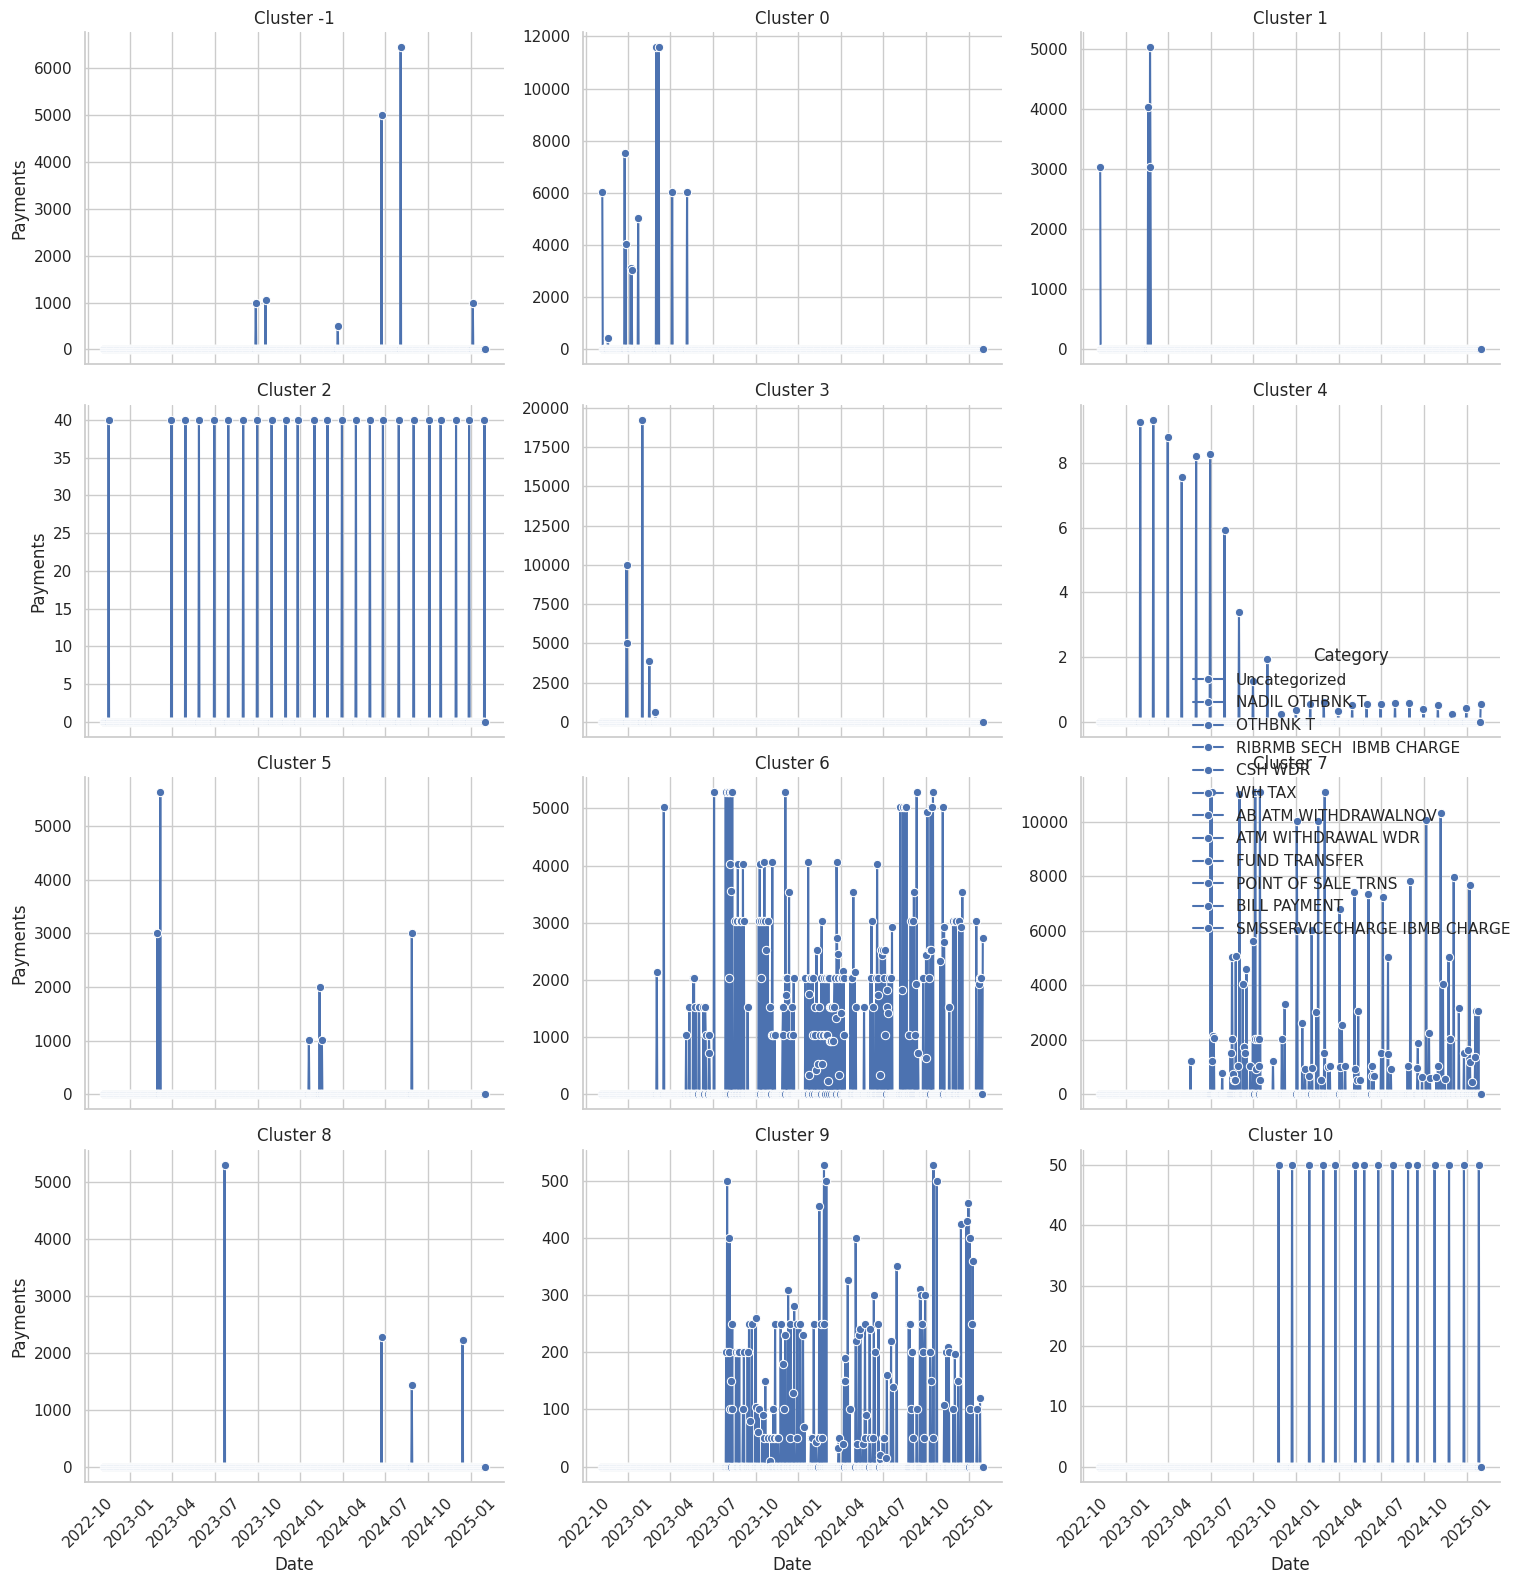

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Date is datetime
expense_data_set_2tft['Date'] = pd.to_datetime(expense_data_set_2tft['Date'])

# Set the style
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(expense_data_set_2tft, col='Cluster', col_wrap=3, height=4, sharey=False)

# Add the line plots to each facet
g.map_dataframe(sns.lineplot, x='Date', y='Payments', hue='Category', marker='o')

# Adjust plot labels and titles
g.set_axis_labels("Date", "Payments")
g.set_titles("Cluster {col_name}")
g.add_legend(title='Category')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


In [35]:
# evaluation_results = evaluate_amount_prediction_model(best_model_lightning_amount, val_dataloader_amount)
evaluation_results = evaluate_amount_prediction_model(best_model_lightning_amount_loaded, val_dataloader_amount)
# visualize_regression_results(evaluation_results)
print(evaluation_results["non_zero_results_df"]) 
# visualize_regression_results(evaluation_results)



MAE: 191.9271240234375
RMSE: 451.4424105021592
RMSE (non-zero targets): 363.47336989798856
     Actual    Predicted
0   3030.00  2469.848633
1   1930.00  1857.563965
2   2030.00  2433.388184
3   2030.00  1301.243164
4   2730.00  2436.030762
5    400.00    69.968521
6    100.00    60.542236
7    250.00    86.316978
8    360.00   116.743858
9    100.00    98.137459
10   120.00    96.253822
11  1630.00  1175.635254
12  7682.00  7663.606445
13  1186.00   935.437378
14   442.00   306.247131
15  1360.00  1908.598999
16  3041.00  2891.501953
17  3060.00  2531.218506
18    40.00     5.586401
19    50.00     1.122680
20  1000.00   153.985535
21     0.56     0.268921


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_amount_prediction_model(model, validation_dataloader, scaler=None):
    """
    Evaluate a regression model (e.g., amount predictions) using MAE, RMSE,
    and RMSE on non-zero targets only (Payment_Indicator == 1).

    Args:
        model: Trained PyTorch Lightning model.
        validation_dataloader: DataLoader for validation data.
        scaler: Scaler (e.g., MinMaxScaler) used during preprocessing.

    Returns:
        Dictionary with MAE, RMSE, RMSE_nonzero, and predictions.
    """
    model.eval()

    predictions = []
    targets = []

    with torch.no_grad():
        for x, y in validation_dataloader:
            output = model(x)
            pred = output["prediction"]  # Shape: [batch_size, prediction_length, 1]
            target = y[0]  # True amount values

            predictions.append(pred)
            targets.append(target)

    # Flatten and move to CPU
    predictions = torch.cat(predictions, dim=0).cpu().numpy().reshape(-1)
    targets = torch.cat(targets, dim=0).cpu().numpy().reshape(-1)

    # Compute overall metrics
    mae = mean_absolute_error(targets, predictions)
    rmse = np.sqrt(mean_squared_error(targets, predictions))

    # Compute RMSE for non-zero targets only (Payment_Indicator == 1)
    non_zero_mask = targets > 0
    if np.any(non_zero_mask):
        rmse_nonzero = np.sqrt(mean_squared_error(targets[non_zero_mask], predictions[non_zero_mask]))
    else:
        rmse_nonzero = None  # or 0.0 if you prefer a default

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("RMSE (non-zero targets):", rmse_nonzero)

    results_df = pd.DataFrame({
        "Actual": targets,
        "Predicted": predictions
    })

    # Optionally, store only Payment_Indicator = 1 (i.e., where Actual > 0)
    non_zero_df = results_df[results_df["Actual"] > 0].reset_index(drop=True)

    # Add these to the return dictionary
    return {
        "metrics": {
            "MAE": mae,
            "RMSE": rmse,
            "RMSE_non_zero": rmse_nonzero  # if you're computing it as before
        },
        "predictions": predictions,
        "targets": targets,
        "all_results_df": results_df,
        "non_zero_results_df": non_zero_df
    }

def visualize_regression_results(evaluation_results):
    """
    Visualize regression evaluation results with scatter and error plots.
    """
    y_true = evaluation_results["targets"]
    y_pred = evaluation_results["predictions"]

    # Scatter plot of predicted vs actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel("Actual Amount")
    plt.ylabel("Predicted Amount")
    plt.title("Predicted vs Actual Amounts")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("MAE:", round(evaluation_results["metrics"]["MAE"], 2))
    print("RMSE:", round(evaluation_results["metrics"]["RMSE"], 2))
    if evaluation_results["metrics"]["RMSE_nonzero"] is not None:
        print("RMSE (Payment_Indicator = 1):", round(evaluation_results["metrics"]["RMSE_nonzero"], 2))
    else:
        print("RMSE (Payment_Indicator = 1): No non-zero targets in evaluation data.")
